In [1]:
import numpy as np
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering\\models\\playground'

In [3]:
# if necessary, change to drone_steering directory.


os.chdir('../..')
os.getcwd()


'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering'

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from app_local.module import XCentralizer, YCentralizer, YScaler
from app_local.module import LabelGenerator, DataEnsembler

In [5]:
de = DataEnsembler(ms_per_frame=120)

data_directory = 'data/gesture/'
de.investigate_available_datafiles( data_dir = data_directory)

de.combined_data_files_df

filename_features       filename_labels
0  features_flip_c_01_120.csv  labels_flip_c_01.csv
1  features_flip_l_01_120.csv  labels_flip_l_01.csv
2  features_flip_p_01_120.csv  labels_flip_p_01.csv
3  features_move_c_01_120.csv  labels_move_c_01.csv
4  features_move_l_01_120.csv  labels_move_l_01.csv
5  features_move_p_01_120.csv  labels_move_p_01.csv
6  features_none_p_01_120.csv       labels_none.csv

In [6]:
de.load_data()
de.assemble_data(tolerance_range = 600, max_error = 500)
de.display_information()

i: 0 	shape X: (537, 17, 16) 	shape y: (537,) 	count: 35
i: 1 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 111
i: 2 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 67
i: 3 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 85
i: 4 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 0
i: 5 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 86
i: 6 	shape X: (541, 17, 16) 	shape y: (541,) 	count: 0
-----------------------------------------------------------------------------
shape final X: (3969, 17, 16)
number of labeled samples: 384


In [7]:
feature_names = list(de.LabelGenerators[0].feature_names)
feature_names

['leftElbow_x',
 'leftElbow_y',
 'leftHip_x',
 'leftHip_y',
 'leftShoulder_x',
 'leftShoulder_y',
 'leftWrist_x',
 'leftWrist_y',
 'rightElbow_x',
 'rightElbow_y',
 'rightHip_x',
 'rightHip_y',
 'rightShoulder_x',
 'rightShoulder_y',
 'rightWrist_x',
 'rightWrist_y']

In [8]:
X = de.X.copy()

In [9]:
X.shape

(3969, 17, 16)

In [10]:
x = X[0,:,:]

In [11]:
x.shape

(17, 16)

In [12]:
xdf = pd.DataFrame(x, columns=feature_names)
xdf

leftElbow_x  leftElbow_y   leftHip_x   leftHip_y  leftShoulder_x  \
0    320.887687   182.349062  314.347552  230.816000      311.561103   
1    322.069697   182.833418  312.400498  233.233930      311.775849   
2    322.733250   182.889811  312.725625  232.988002      312.460549   
3    325.253514   183.365339  313.866852  234.030783      313.511280   
4    323.620918   183.180860  310.670503  234.276107      313.255297   
5    323.090994   184.077576  317.752579  231.460725      312.196414   
6    324.668134   188.474397  316.017503  237.736033      313.864762   
7    326.456644   190.725710  312.720542  236.918252      315.057335   
8    327.129586   190.746895  313.637477  238.625200      314.687640   
9    327.632457   193.380515  313.994246  240.113169      312.675104   
10   327.859101   192.765759  314.031830  239.842202      312.892840   
11   327.311948   194.845196  316.039548  245.114569      314.310271   
12   328.580455   194.780505  317.588410  245.746974      315.197558   
13   329.152784   195.579605  314.364728  247.019096      315.987833   
14   330.237484   197.597570  315.331480  247.072382      316.961214   
15   326.191083   196.087275  316.108678  247.277756      318.026781   
16   330.652879   198.063794  317.111272  247.594685      318.645720   

    leftShoulder_y  leftWrist_x  leftWrist_y  rightElbow_x  rightElbow_y  \
0       125.659389   332.064043   235.748133    239.796790    185.566538   
1       125.657545   333.605781   237.301374    240.632927    184.094592   
2       126.066225   335.213848   238.292147    240.536637    184.266400   
3       125.171998   336.657547   238.603840    242.282477    184.875989   
4       126.910689   336.853370   237.451494    240.647002    185.070646   
5       127.994862   338.070173   232.648487    239.929596    186.889701   
6       128.629241   336.794965   239.626484    241.915958    186.159248   
7       129.656114   337.142441   241.566937    241.965089    191.363663   
8       131.927222   335.126934   243.119827    242.024015    191.645347   
9       135.144087   335.402439   243.145736    242.149950    192.917389   
10      135.876857   334.493292   244.093987    241.787500    193.312216   
11      137.447089   338.570634   247.587842    242.523687    196.322775   
12      138.829509   337.041248   246.088770    242.391050    197.342518   
13      139.112058   337.321018   247.161428    242.575001    198.845731   
14      140.199761   339.036307   247.061355    242.628109    200.128221   
15      140.223262   337.980886   248.847353    242.607646    201.940522   
16      141.643284   338.098494   250.403484    244.917285    202.445251   

    rightHip_x  rightHip_y  rightShoulder_x  rightShoulder_y  rightWrist_x  \
0   270.312635  231.982183       246.479521       121.432370    238.622666   
1   270.662814  232.942973       245.513863       121.647967    247.402520   
2   267.074018  230.834356       248.820106       122.612895    240.552820   
3   268.914766  230.071647       247.527299       122.934101    243.246776   
4   267.832464  230.431902       250.166794       123.419319    241.640053   
5   268.311177  231.184368       248.294276       126.242117    241.872134   
6   269.160983  233.061251       249.231858       127.466965    240.461069   
7   269.535072  234.898362       250.416483       128.088089    240.894572   
8   268.728690  237.653684       248.160528       129.663223    247.382529   
9   270.097019  240.542124       249.696176       134.191142    246.496354   
10  270.174755  241.326017       250.181355       134.501274    245.485773   
11  268.829547  242.500725       248.461830       136.937803    244.504454   
12  269.087094  243.228602       250.206823       136.462473    250.112615   
13  270.040190  244.686747       249.940757       136.899650    243.644926   
14  270.773566  244.891783       250.561037       138.451293    244.894948   
15  270.987126  246.066977       250.883724       138.289701    245.285236   
16  275.3173

In [13]:
feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
feat_dict

{'leftElbow_x': 0,
 'leftElbow_y': 1,
 'leftHip_x': 2,
 'leftHip_y': 3,
 'leftShoulder_x': 4,
 'leftShoulder_y': 5,
 'leftWrist_x': 6,
 'leftWrist_y': 7,
 'rightElbow_x': 8,
 'rightElbow_y': 9,
 'rightHip_x': 10,
 'rightHip_y': 11,
 'rightShoulder_x': 12,
 'rightShoulder_y': 13,
 'rightWrist_x': 14,
 'rightWrist_y': 15}

In [ ]:
idx_x = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_x')]
idx_x

In [ ]:
idx_y = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_y')]
idx_y

In [ ]:
idx_hip_shoulder_x = [feat_dict[key] for key in feat_dict.keys()\
                      if key.endswith('_x') and ('Hip' in key or 'Shoulder' in key) ]
idx_hip_shoulder_x

In [ ]:
idx_hip_y = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_y') and ('Hip' in key) ]
idx_hip_y

In [ ]:
idx_shoulder_y = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_y') and ('Shoulder' in key) ]
idx_shoulder_y

In [ ]:
idx_hip_shoulder_y = sorted(idx_shoulder_y + idx_hip_y)
idx_hip_shoulder_y 

In [ ]:
x[:,idx_hip_shoulder_x].mean(axis = 1)

In [ ]:
mX = X[:,:,idx_hip_shoulder_x].mean(axis = 2)
mX.shape

In [ ]:
xX = X[:,:,idx_x]
xX.shape

In [ ]:
# each timestep is centralized. Trailing dimensions have to be equal ==> transpose
X = de.X.copy()
X[:,:,idx_x] = (X[:,:,idx_x].transpose() - X[:,:,idx_hip_shoulder_x].mean(axis = 2).transpose()).transpose()
X[:,:,idx_y] = (X[:,:,idx_y].transpose() - X[:,:,idx_hip_shoulder_y].mean(axis = 2).transpose()).transpose()
abs(X[:,:,idx_hip_shoulder_x].mean(axis = (1,2))).sum()

In [ ]:
X = de.X.copy()
print(X[:,:,idx_hip_shoulder_x].mean(axis = (1,2)).shape)
print(X[:,:,idx_x].shape)
X[:,:,idx_x] = (X[:,:,idx_x].transpose() - X[:,:,idx_hip_shoulder_x].mean(axis = (1,2)).transpose()).transpose()
abs(X[:,:,idx_hip_shoulder_x].mean(axis = (2))).sum()
len(X.shape)

In [ ]:
def centralize(M, byrow = True):
    X = M.copy()
    
    if len(M.shape) != 3:
        raise IndexError("Input Array does not have the right dimensions")
        
    if byrow:
        ax = (2)
    else: # by sample
        ax = (1,2)
        
    X[:,:,idx_x] = (X[:,:,idx_x].transpose() - X[:,:,idx_hip_shoulder_x].mean(axis = ax).transpose()).transpose()
    X[:,:,idx_y] = (X[:,:,idx_y].transpose() - X[:,:,idx_hip_shoulder_y].mean(axis = ax).transpose()).transpose()
    
    return X
    

In [ ]:
X = de.X.copy()
print(X.shape)

ax = (2)
A = (X[:,:,idx_shoulder_y].mean(axis = ax) - X[:,:,idx_hip_y].mean(axis = ax))
print(A.shape)

ax = (1,2)
b = (X[:,:,idx_shoulder_y].mean(axis = ax) - X[:,:,idx_hip_y].mean(axis = ax))
print(b.shape)

In [ ]:
def scale(M, byrow = True):
    X = M.copy()
    
    if len(M.shape) != 3:
        raise IndexError("Input Array does not have the right dimensions")
        
    if byrow:
        ax = (2)
    else: # by sample
        ax = (1,2)
        
    X = (X.transpose() / (X[:,:,idx_shoulder_y].mean(axis = ax) - X[:,:,idx_hip_y].mean(axis = ax)).transpose()).transpose()
    
    return X

In [ ]:
print((X.transpose() / b.transpose()).transpose().shape)
print((X.transpose() / A.transpose()).transpose().shape)

In [ ]:
M = np.zeros((3,3,16))

for x in range(3):
    for y in range(3):
        for z in range(16):
            M[x,y,z] = (x * 10 + y) * ((-1) ** (z%2))
            
M[1,:,:]

In [ ]:
Z = centralize(M, byrow=True)
Z[1,:,:]

In [ ]:
Z = centralize(M, byrow=False)
Z[1,:,:]

In [16]:
class GestureTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names, byrow = True):
        self.byrow = byrow
        self.feature_names = feature_names
        self.feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
        self.idx_x = [self.feat_dict[key] for key in self.feat_dict.keys() if key.endswith('_x')]
        self.idx_y = [self.feat_dict[key] for key in self.feat_dict.keys() if key.endswith('_y')]
        self.idx_hip_shoulder_x = [feat_dict[key] for key in self.feat_dict.keys()\
                      if key.endswith('_x') and ('Hip' in key or 'Shoulder' in key) ]
        self.idx_hip_y = [feat_dict[key] for key in self.feat_dict.keys()\
                      if key.endswith('_y') and ('Hip' in key) ]
        self.idx_shoulder_y = [feat_dict[key] for key in self.feat_dict.keys()\
                      if key.endswith('_y') and ('Shoulder' in key) ]
        self.idx_hip_shoulder_y = sorted(self.idx_hip_y + self.idx_shoulder_y)
        
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        
        Z = X.copy()
        
        if self.byrow:
            ax = (2)
        else:
            ax = (1,2)
         
        self.x_shift = Z[:,:,self.idx_hip_shoulder_x].mean(axis = ax)
        Z[:,:,self.idx_x] = (Z[:,:,self.idx_x].transpose() - self.x_shift.transpose()).transpose()
        
        self.y_shift = Z[:,:,self.idx_hip_shoulder_y].mean(axis = ax)
        Z[:,:,self.idx_y] = (Z[:,:,self.idx_y].transpose() - self.y_shift.transpose()).transpose()
        
        self.scale = (Z[:,:,self.idx_shoulder_y].mean(axis = ax) - Z[:,:,self.idx_hip_y].mean(axis = ax))
        Z = (Z.transpose() / self.scale.transpose()).transpose()    
        
        return Z
    
gt = GestureTransformer(feature_names)
gt.transform(de.X)[900,:,:]

array([[-0.30877843,  0.06887989, -0.19330071, -0.47943929, -0.30341244,
         0.4956102 , -0.29297107, -0.3830554 ,  0.40138342, -0.01891026,
         0.20546981, -0.52056071,  0.29124334,  0.5043898 ,  0.47015547,
        -0.39514978],
       [-0.16224371, -0.01244581, -0.17304011, -0.48006514, -0.28766589,
         0.5229988 , -0.03692697, -0.01753412,  0.36752163, -0.09253463,
         0.18116652, -0.51993486,  0.27953948,  0.4770012 ,  0.52005236,
        -0.4295109 ],
       [-0.21620736,  0.18025052, -0.1502083 , -0.48736484, -0.2752241 ,
         0.54241201,  0.0570429 ,  0.35346116,  0.40288044, -0.05780108,
         0.15192237, -0.51263516,  0.27351003,  0.45758799,  0.42103945,
        -0.18198949],
       [-0.24770927,  0.40971796, -0.23670068, -0.50871009, -0.23632263,
         0.49711599, -0.05415422,  0.64335968,  0.41549347, -0.05741075,
         0.14939098, -0.49128991,  0.32363232,  0.50288401,  0.43182002,
        -0.40527267],
       [-0.18599137,  0.44992121, -0

In [18]:
P = gt.transform(de.X)

In [56]:
j = 2
print(de.combined_data_files_df.iloc[j])
print("")
lgen = de.LabelGenerators[j]
n = len(lgen.y)
print("n:",n)
print("")
gt = GestureTransformer(byrow=True, feature_names=feature_names)
X = gt.transform(lgen.X)

de.LabelGenerators[j].label_df.join(de.LabelGenerators[j].label_info)

filename_features    features_flip_p_01_120.csv
filename_labels            labels_flip_p_01.csv
Name: 2, dtype: object

n: 532



label  real_start  real_end   from     to  ignore  diff  l_slack  u_slack  \
0       5       18700     20450  20025  20625   False  -250     -425      175   
1       5       20400     22400  22100  22700   False     0     -300      300   
2       5       22350     24500  24275  24875   False   150     -225      375   
3       5       26650     28550  28200  28800   False  -100     -350      250   
4       5       30700     32600  32250  32850   False  -100     -350      250   
5       5       34650     36350  35900  36500   False  -300     -450      150   
6       5       38650     40550  40200  40800   False  -100     -350      250   
7       5       42600     44500  44150  44750   False  -100     -350      250   
8       5       46500     48400  48050  48650   False  -100     -350      250   
9       5       50700     52500  52100  52700   False  -200     -400      200   
10      5       54800     56500  56050  56650   False  -300     -450      150   
11      5       58650     60400  59975  60575   False  -250     -425      175   
12      5       62700     64600  64250  64850   False  -100     -350      250   

    tol_range_indicator  
0                  True  
1                  True  
2                  True  
3                  True  
4                  True  
5                  True  
6                  True  
7                  True  
8                  True  
9                  True  
10                 True  
11                 True  
12                 True

In [57]:
lgen.sequence_end_time[lgen.y > 0]

array([20040, 20160, 20280, 20400, 20520, 22200, 22320, 22440, 22560,
       22680, 24360, 24480, 24600, 24720, 24840, 28200, 28320, 28440,
       28560, 28680, 28800, 32280, 32400, 32520, 32640, 32760, 36000,
       36120, 36240, 36360, 36480, 40200, 40320, 40440, 40560, 40680,
       40800, 44160, 44280, 44400, 44520, 44640, 48120, 48240, 48360,
       48480, 48600, 52200, 52320, 52440, 52560, 52680, 56160, 56280,
       56400, 56520, 56640, 60000, 60120, 60240, 60360, 60480, 64320,
       64440, 64560, 64680, 64800])

In [58]:
np.where(lgen.y > 0)

(array([150, 151, 152, 153, 154, 168, 169, 170, 171, 172, 186, 187, 188,
        189, 190, 218, 219, 220, 221, 222, 223, 252, 253, 254, 255, 256,
        283, 284, 285, 286, 287, 318, 319, 320, 321, 322, 323, 351, 352,
        353, 354, 355, 384, 385, 386, 387, 388, 418, 419, 420, 421, 422,
        451, 452, 453, 454, 455, 483, 484, 485, 486, 487, 519, 520, 521,
        522, 523], dtype=int64),)

In [85]:
#P = gt.transform(de.X)
#y = de.y
P = gt.transform(de.LabelGenerators[2].X)
y = de.LabelGenerators[2].y
circleData = P[y == 5,:,:]
print(circleData.shape)
circleData = circleData[:,:,[feat_dict[kx],feat_dict[ky]]]
avgCircle = circleData.mean(axis = 0)
avgCircle

(67, 17, 16)


array([[-0.09805241,  0.14925641],
       [-0.09404967,  0.45260609],
       [-0.15960461,  0.7483838 ],
       [-0.2875077 ,  0.95866697],
       [-0.4517014 ,  1.07552512],
       [-0.63713045,  1.02943037],
       [-0.78629763,  0.84107388],
       [-0.87977518,  0.56271486],
       [-0.86991898,  0.24624219],
       [-0.78658558, -0.04797643],
       [-0.65985042, -0.27507409],
       [-0.5239155 , -0.41316283],
       [-0.41181496, -0.48919833],
       [-0.34551893, -0.50393662],
       [-0.3213881 , -0.48233271],
       [-0.3151719 , -0.44359483],
       [-0.31437306, -0.40110769]])

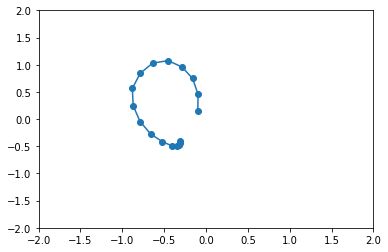

In [87]:
def squared_error(a,b,c,d):
    return round(((a-b)**2 + (c-d)**2).sum(),2)

squared_error(avgCircle[:,0], X[i,:,feat_dict[kx]], avgCircle[:,1], X[i,:,feat_dict[ky]])
axes = plt.gca()
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plt.plot(avgCircle[:,0],avgCircle[:,1],marker = "o")
plt.show()
plt.close()

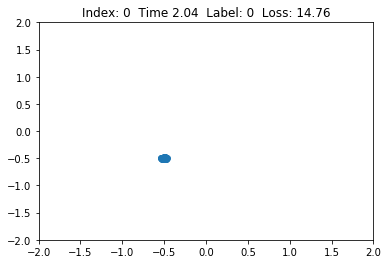

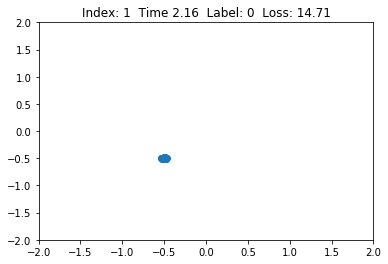

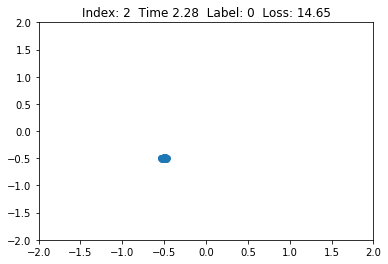

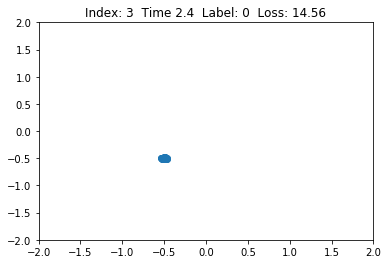

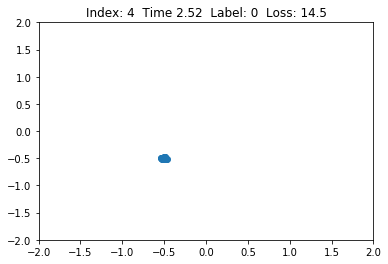

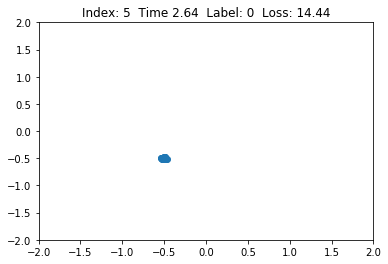

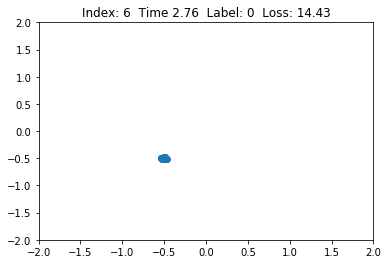

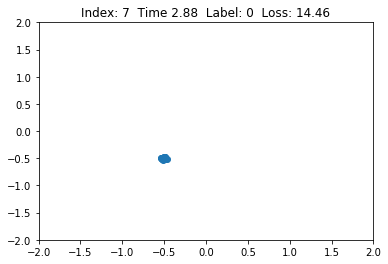

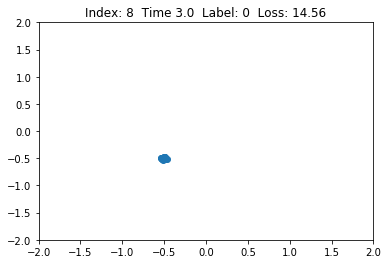

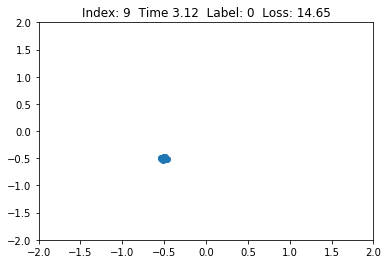

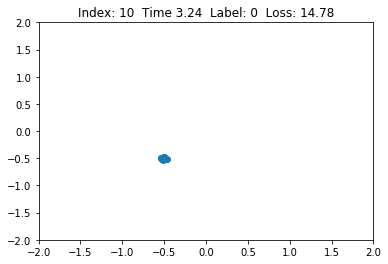

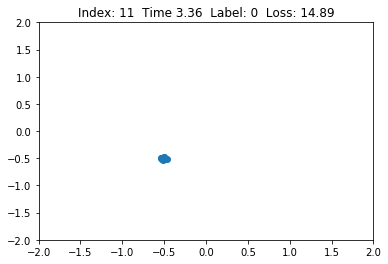

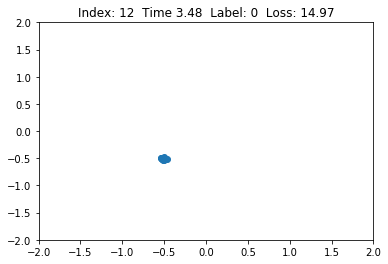

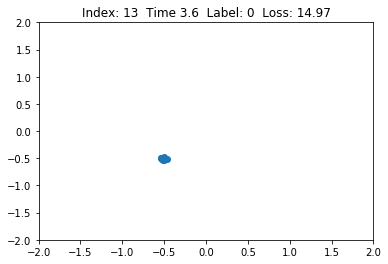

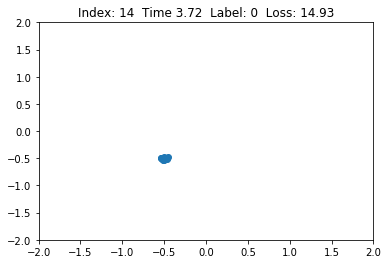

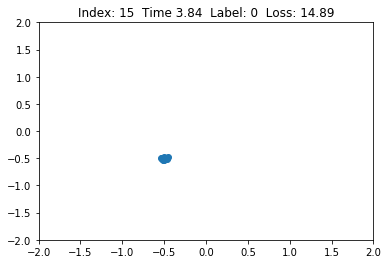

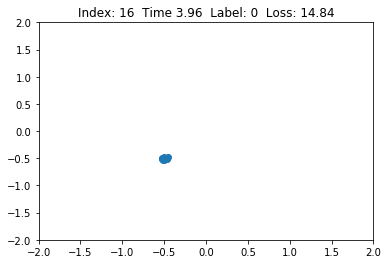

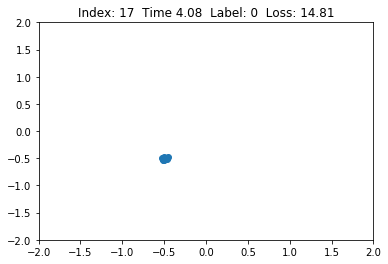

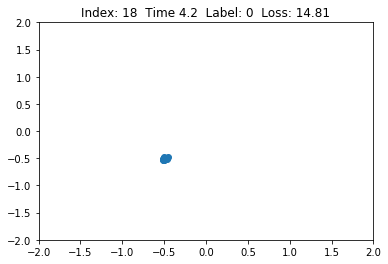

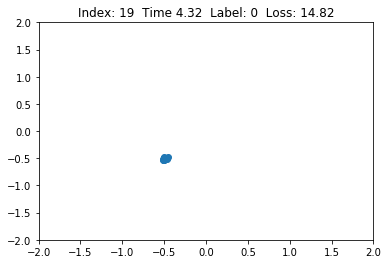

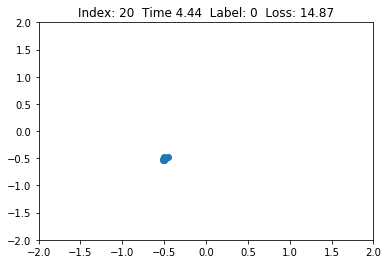

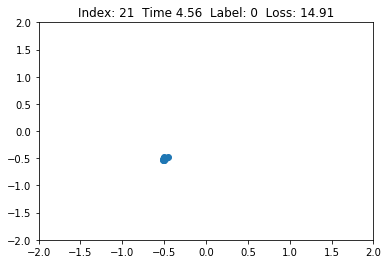

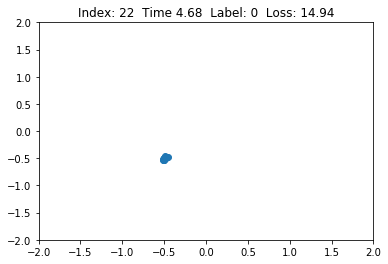

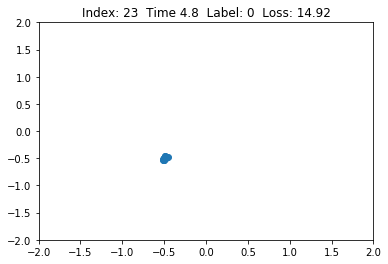

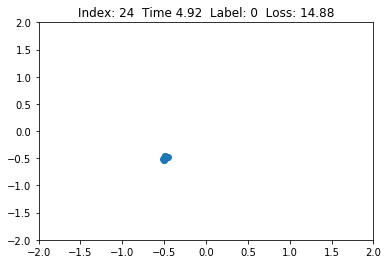

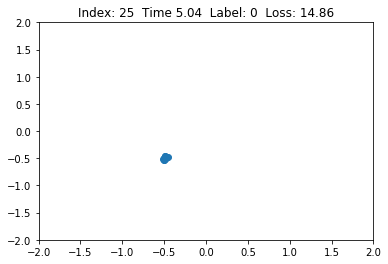

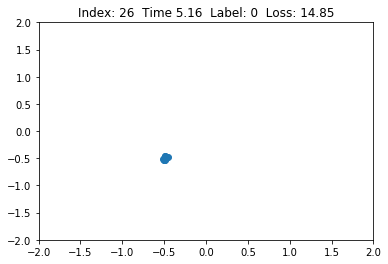

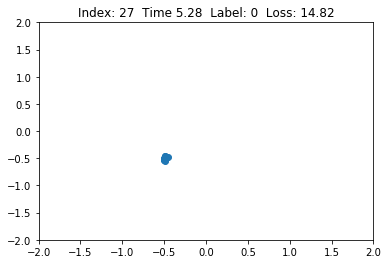

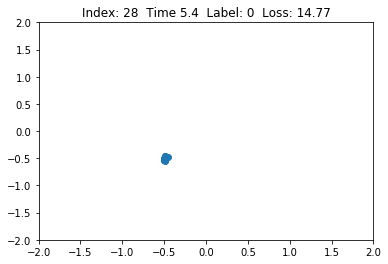

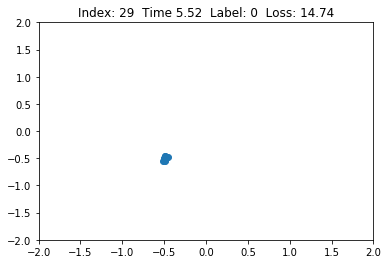

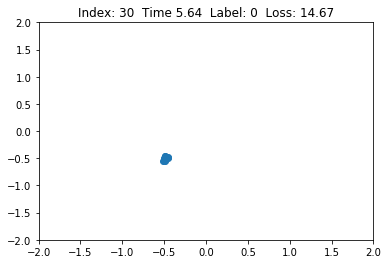

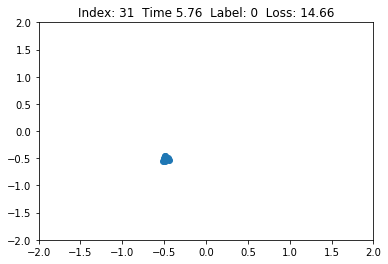

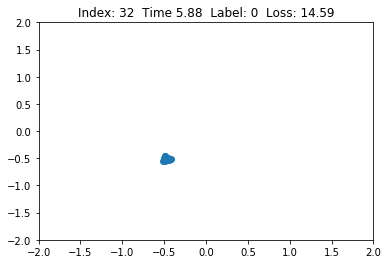

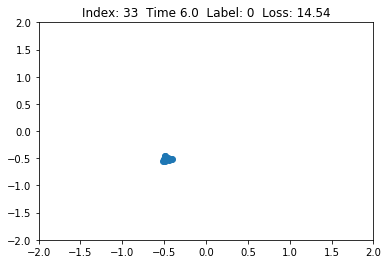

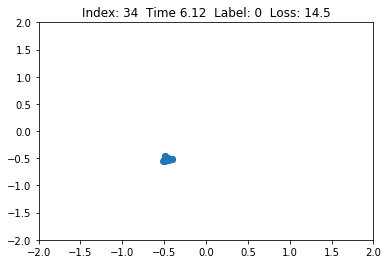

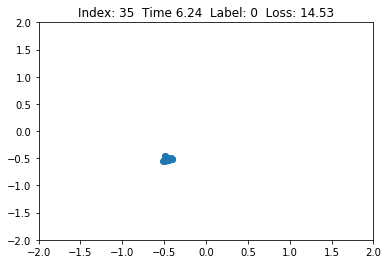

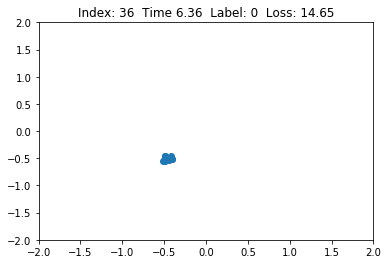

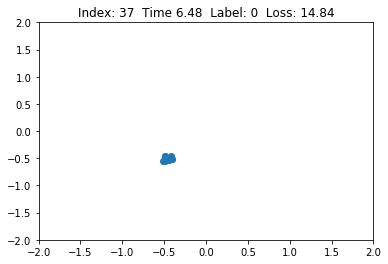

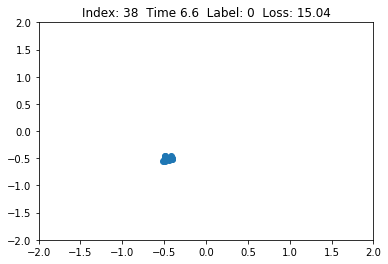

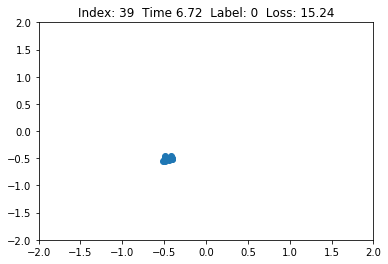

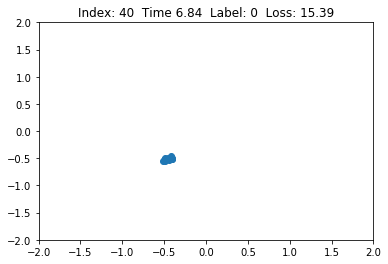

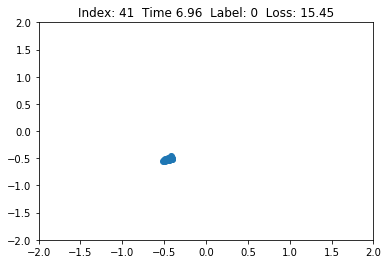

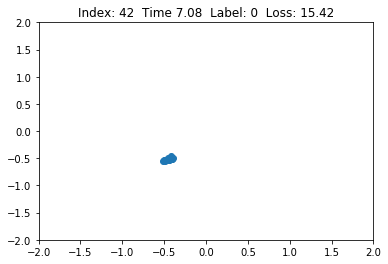

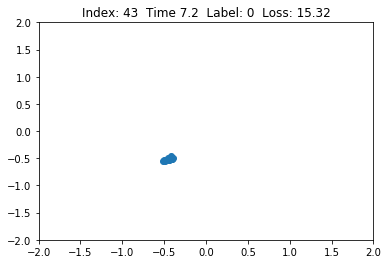

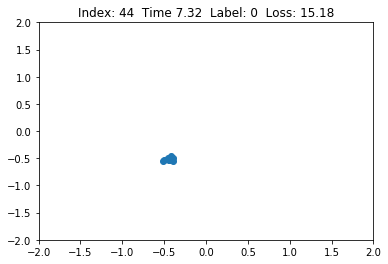

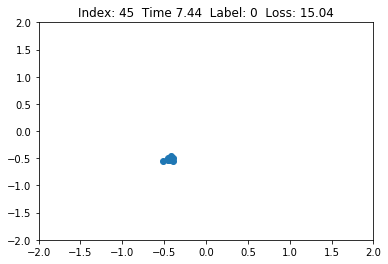

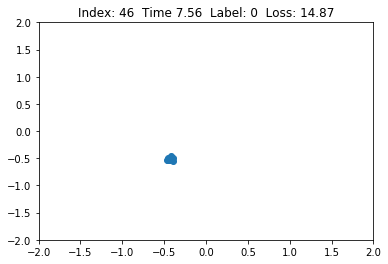

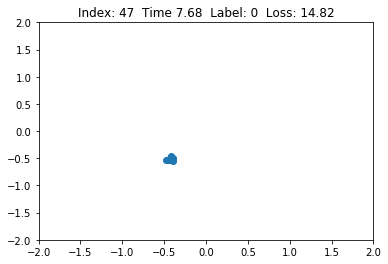

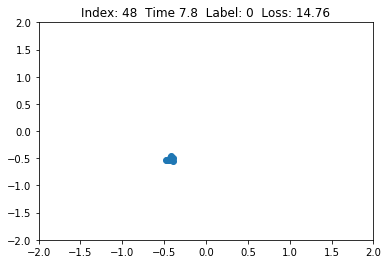

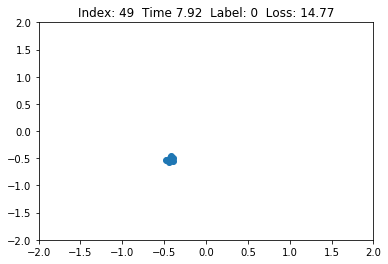

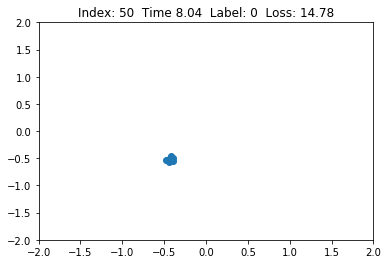

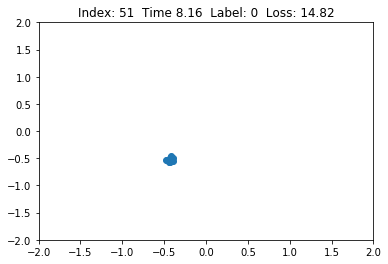

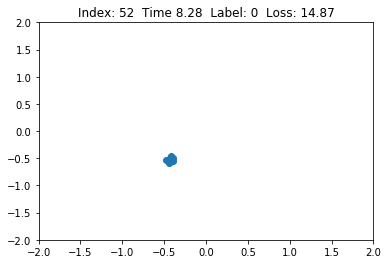

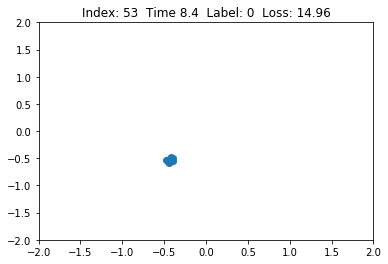

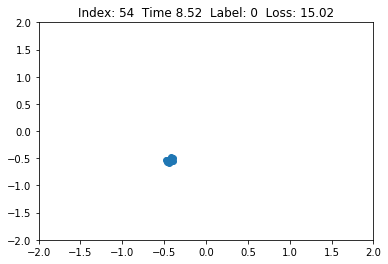

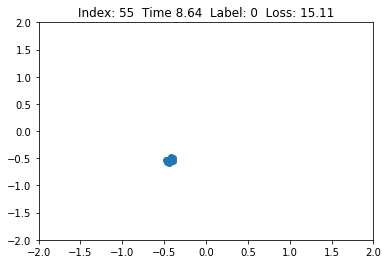

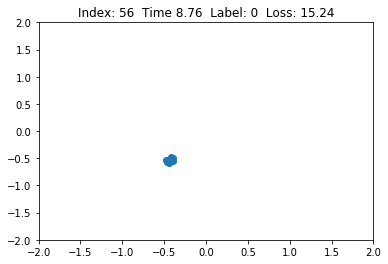

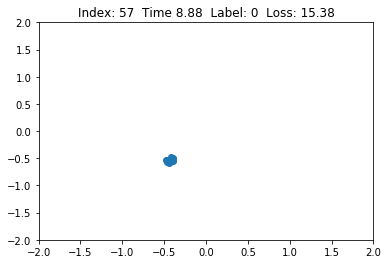

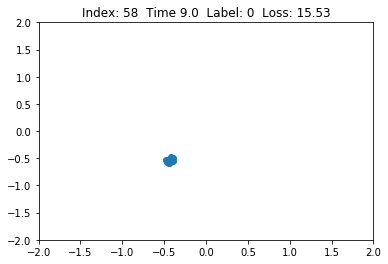

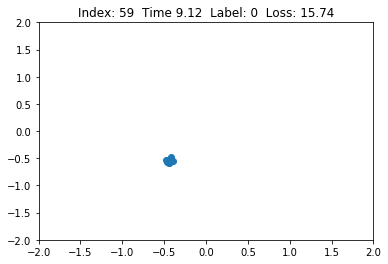

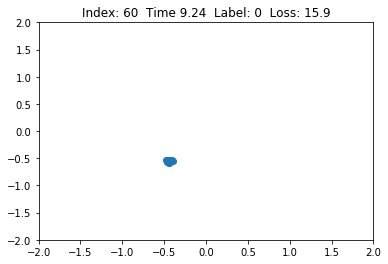

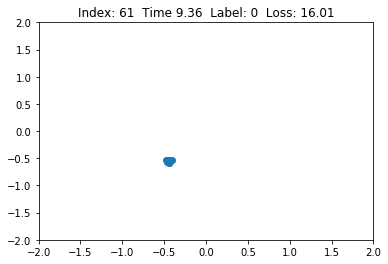

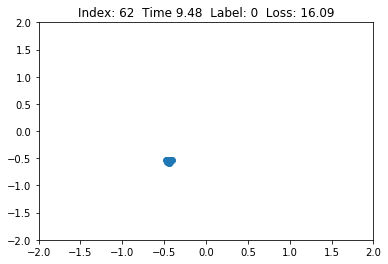

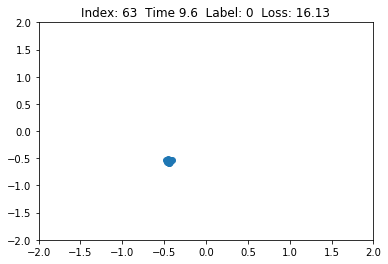

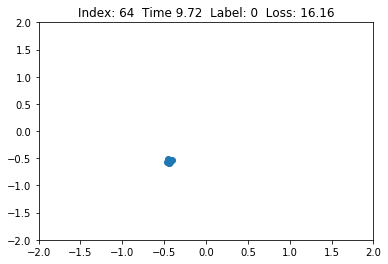

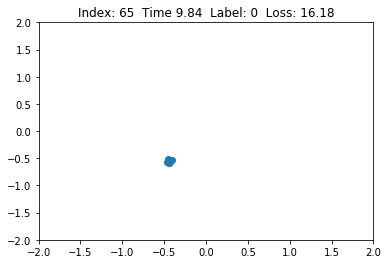

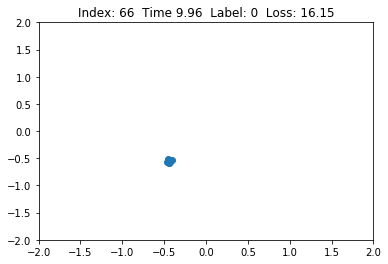

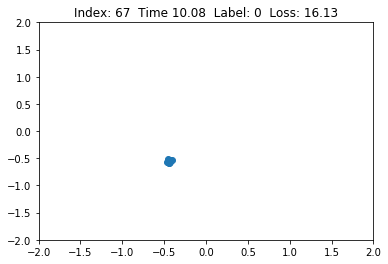

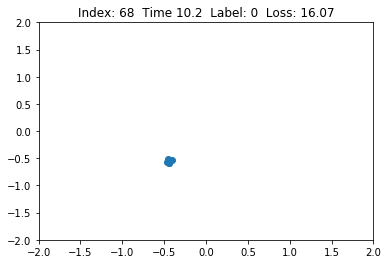

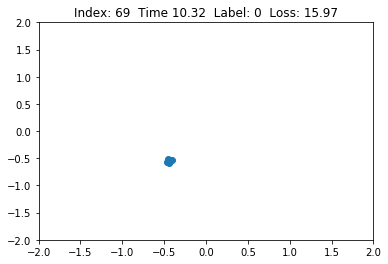

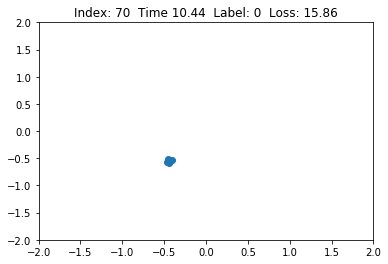

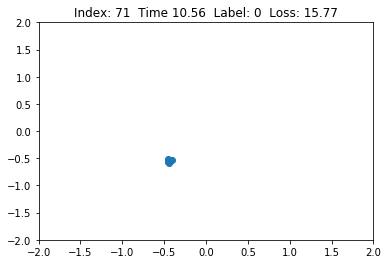

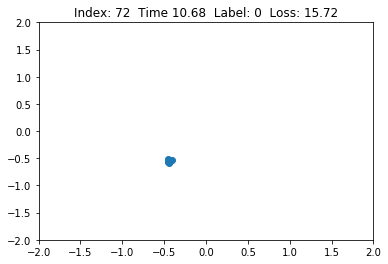

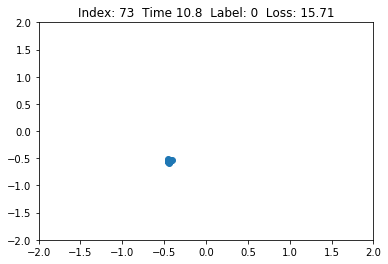

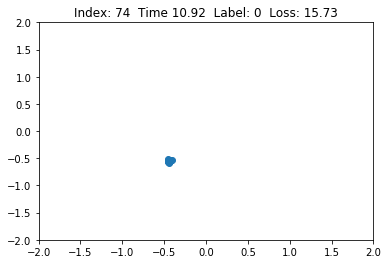

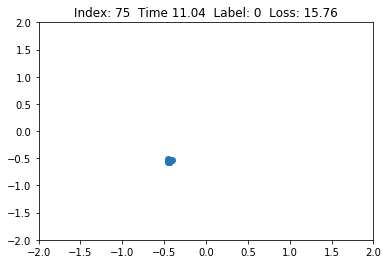

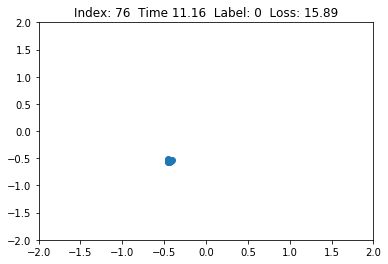

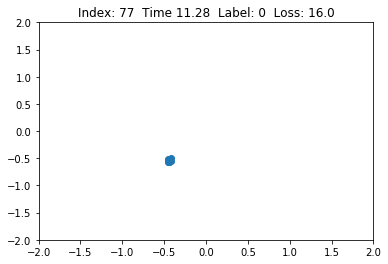

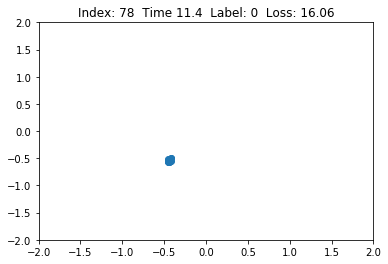

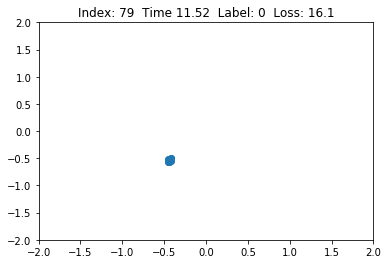

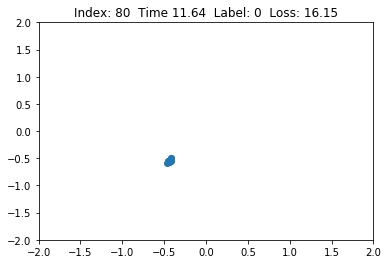

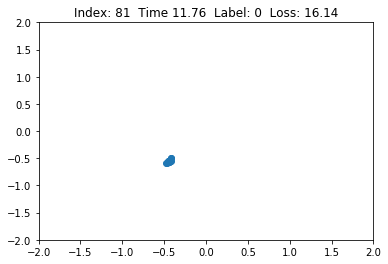

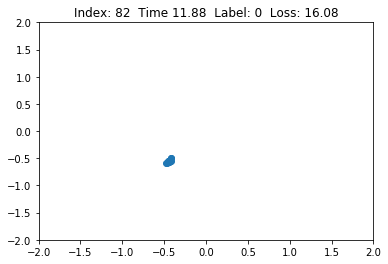

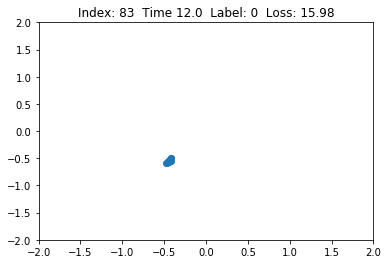

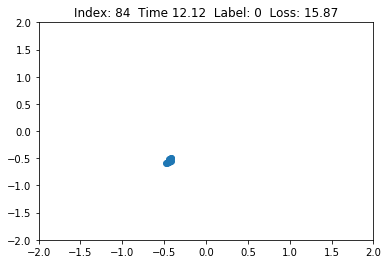

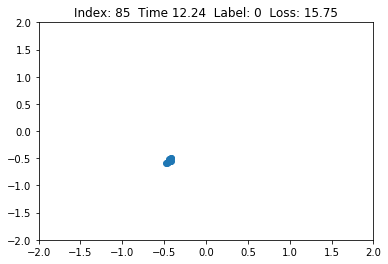

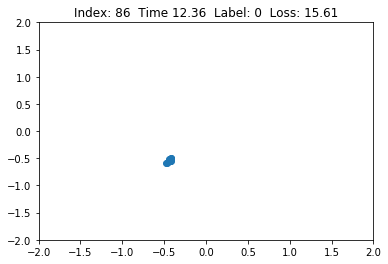

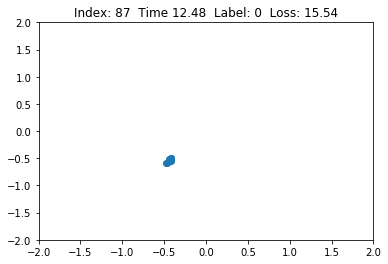

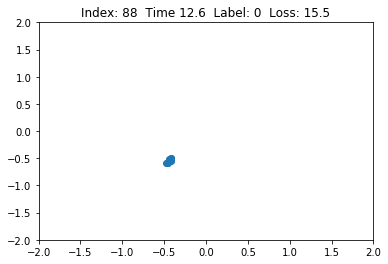

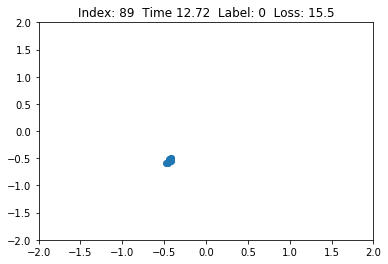

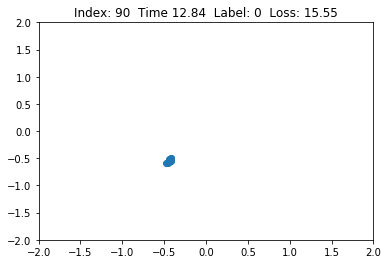

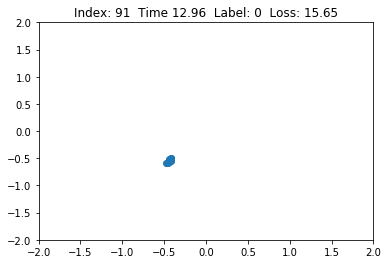

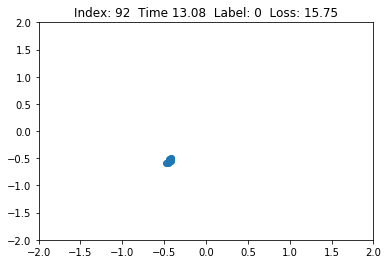

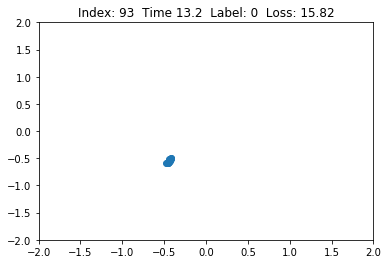

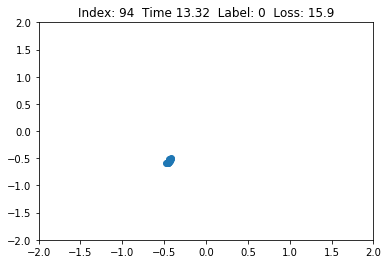

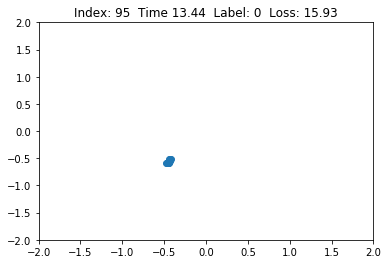

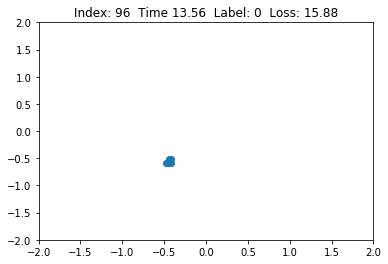

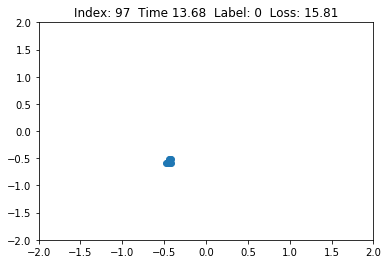

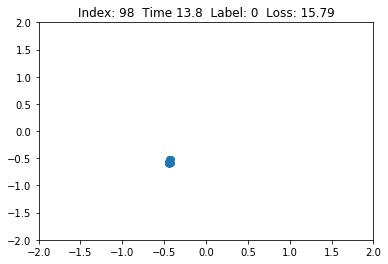

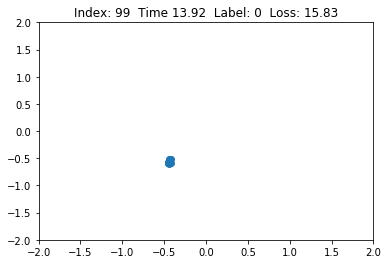

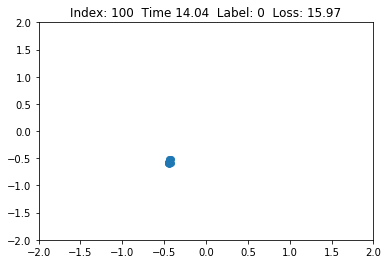

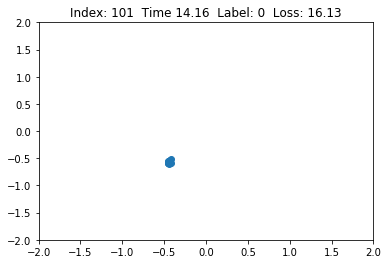

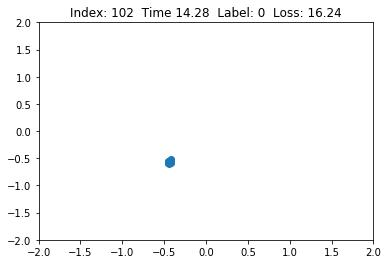

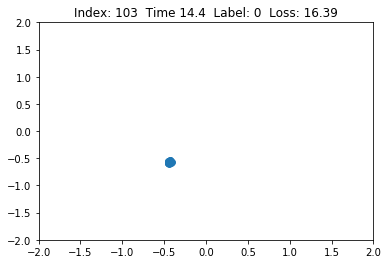

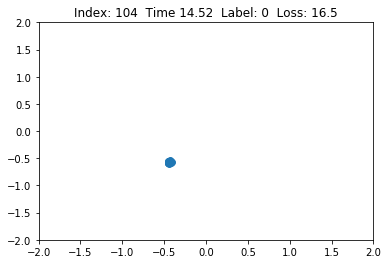

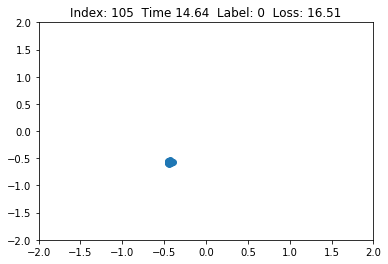

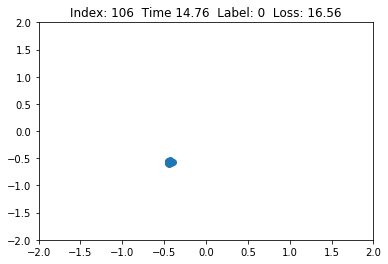

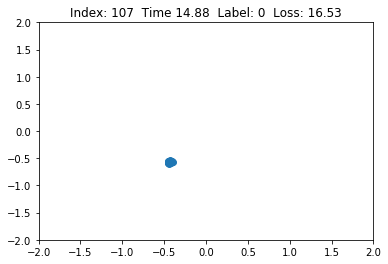

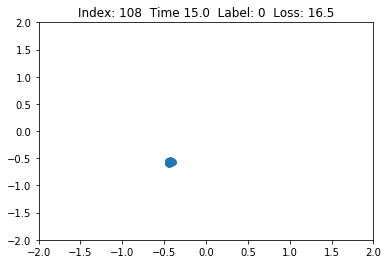

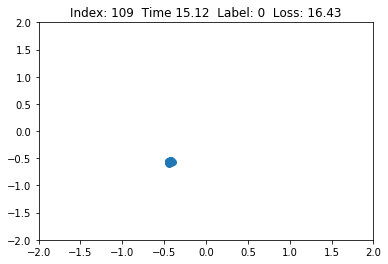

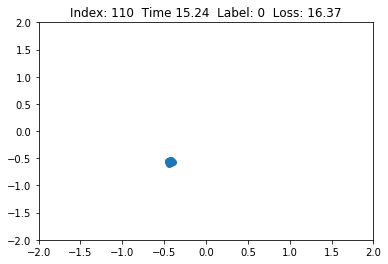

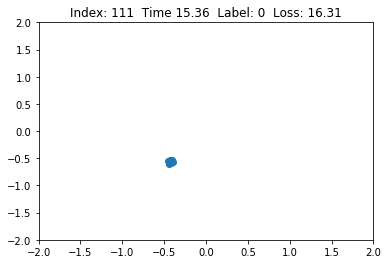

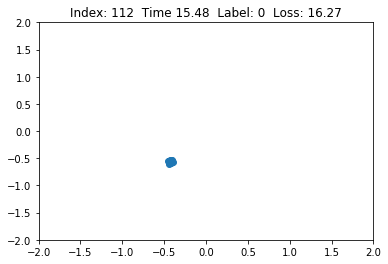

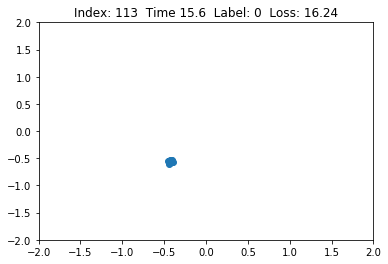

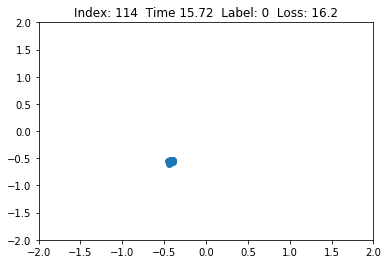

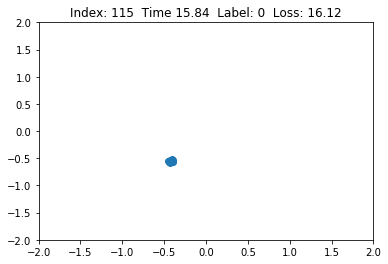

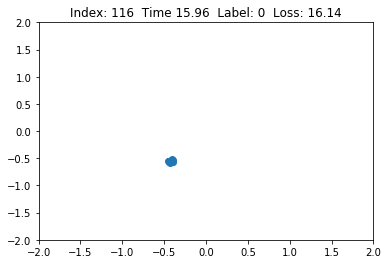

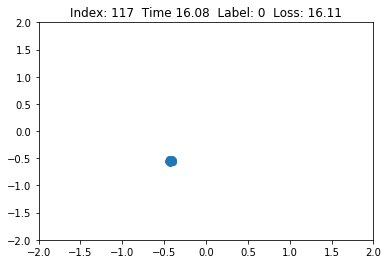

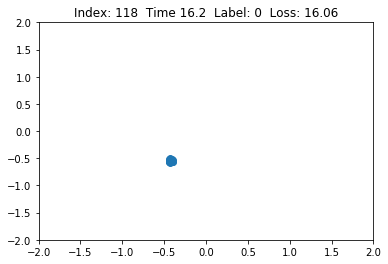

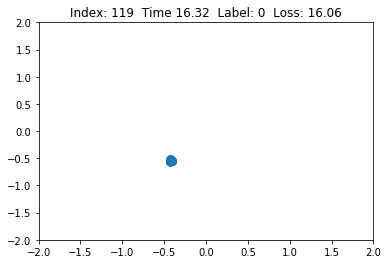

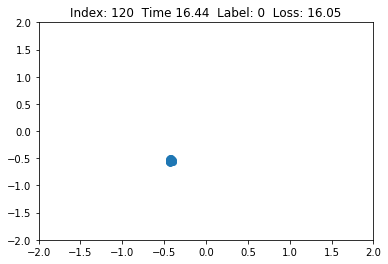

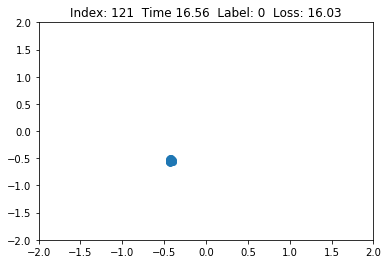

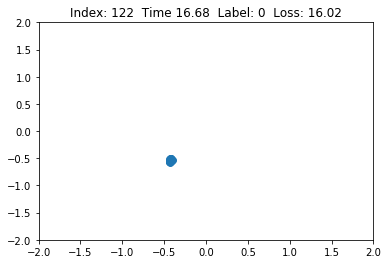

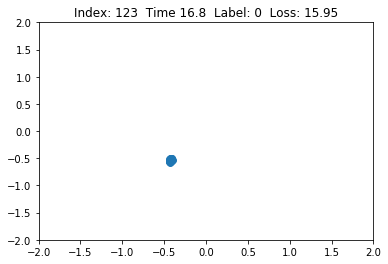

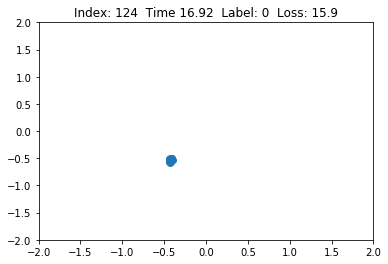

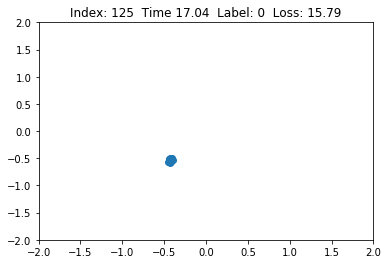

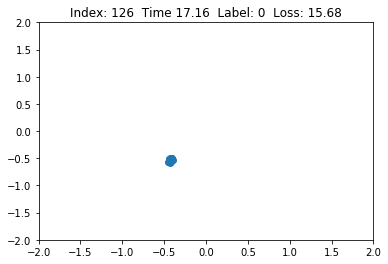

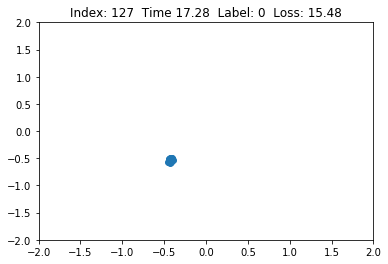

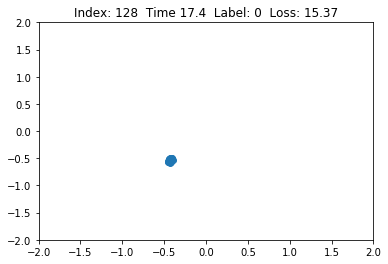

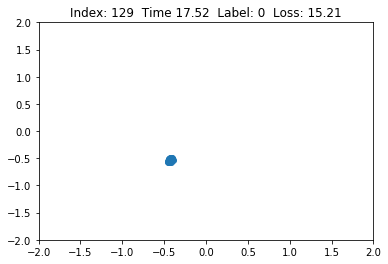

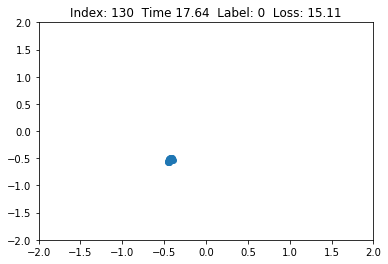

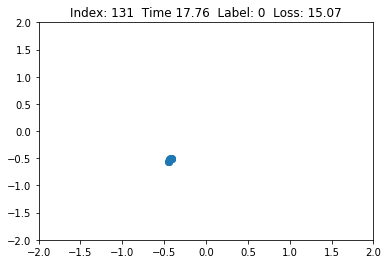

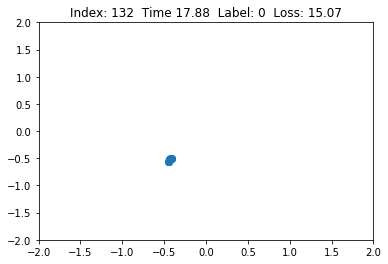

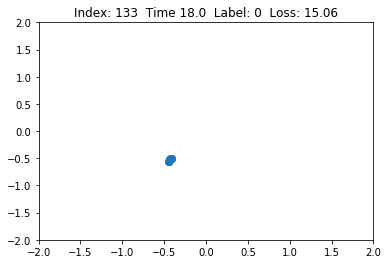

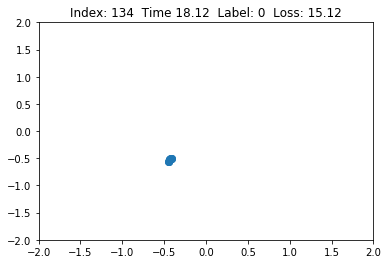

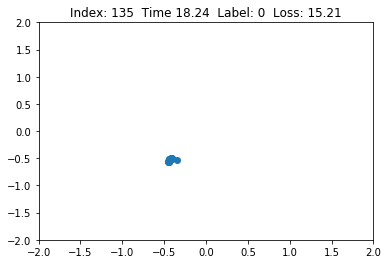

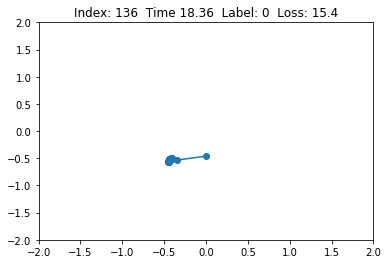

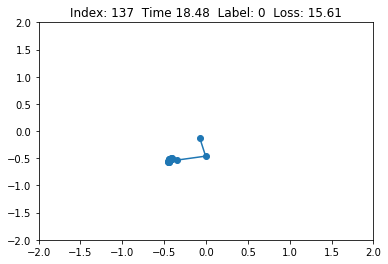

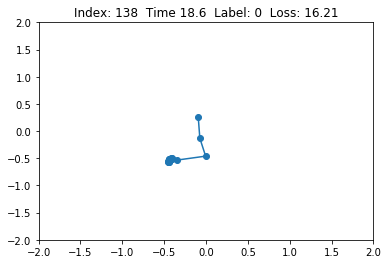

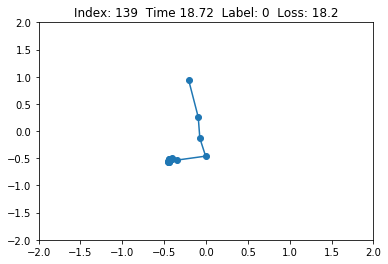

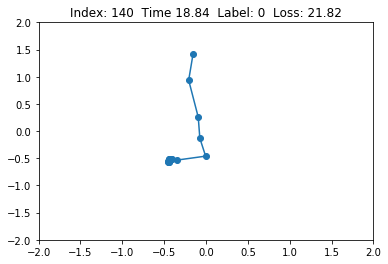

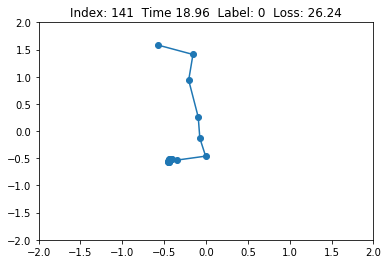

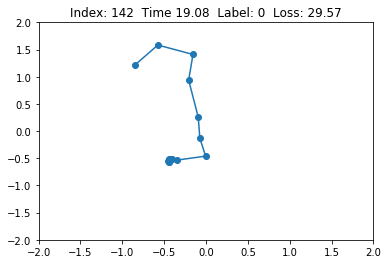

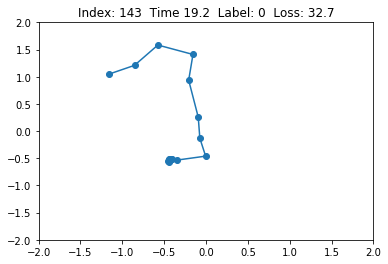

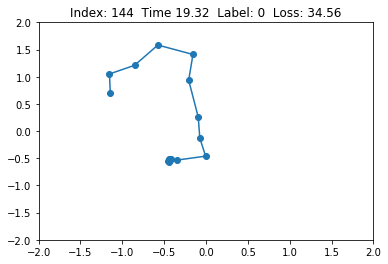

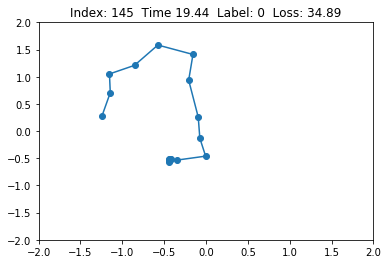

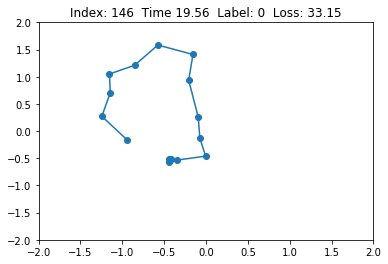

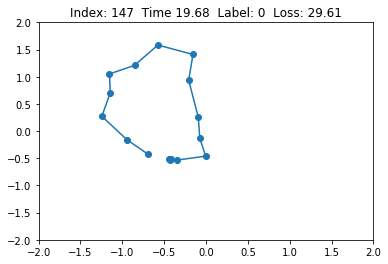

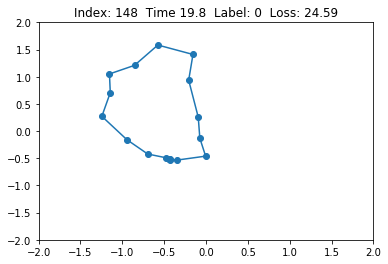

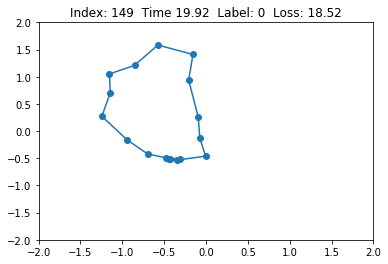

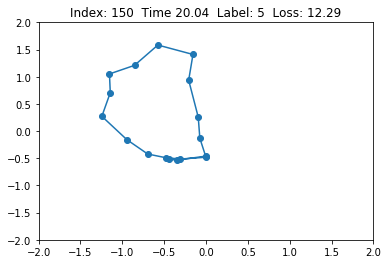

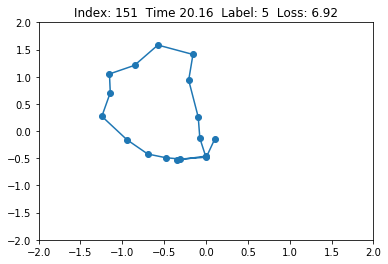

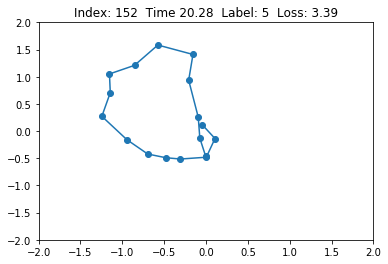

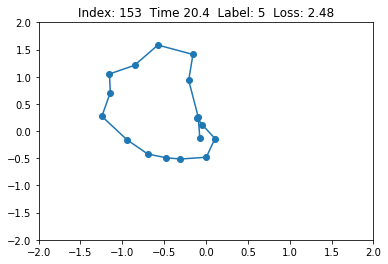

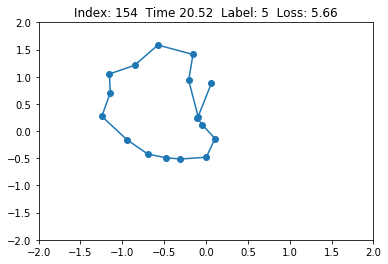

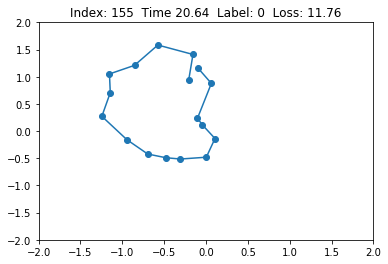

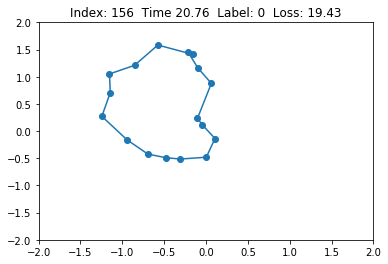

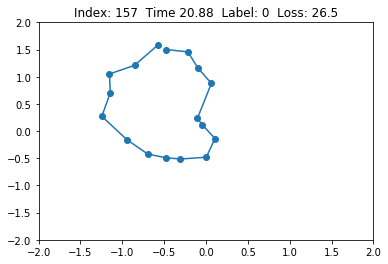

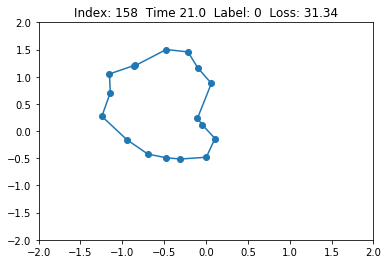

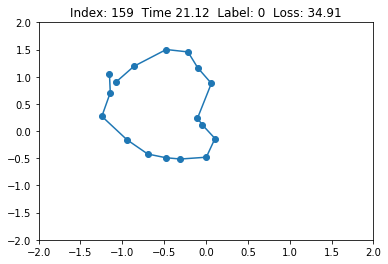

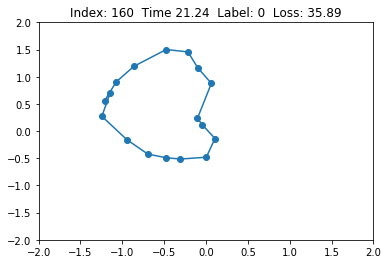

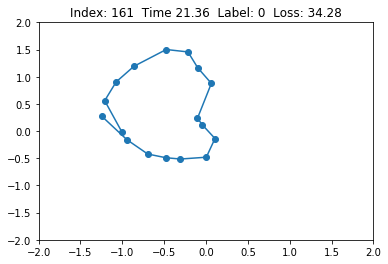

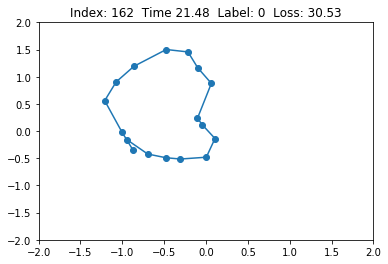

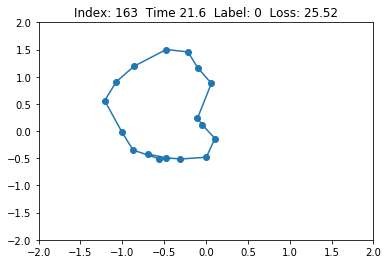

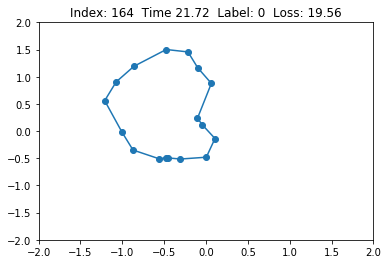

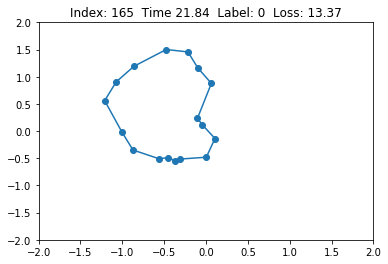

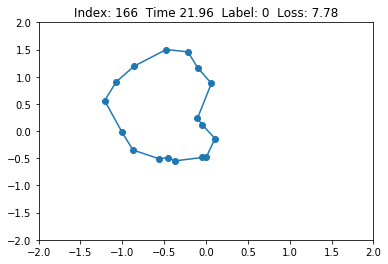

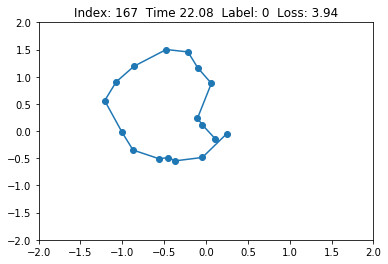

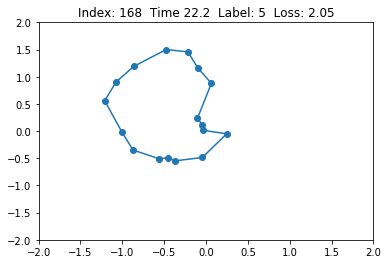

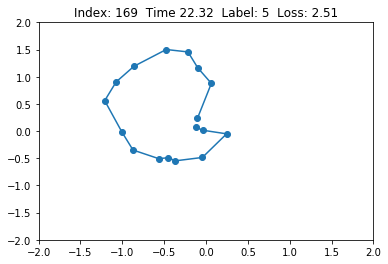

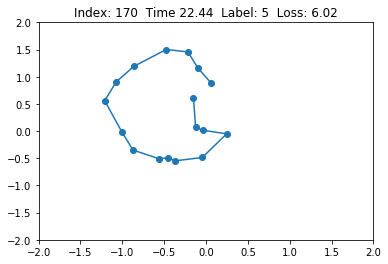

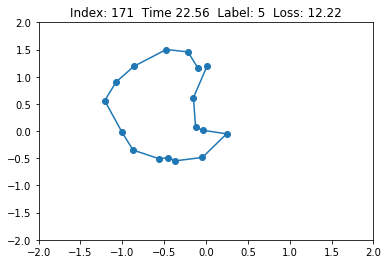

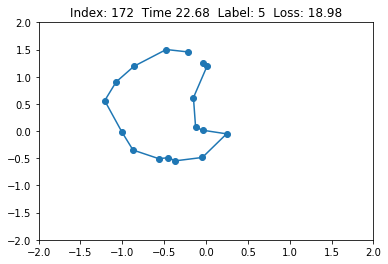

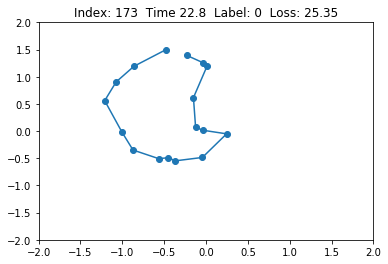

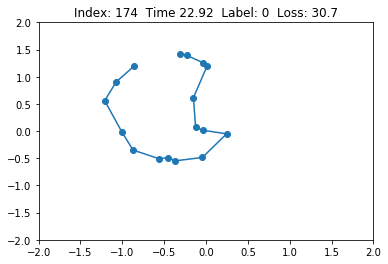

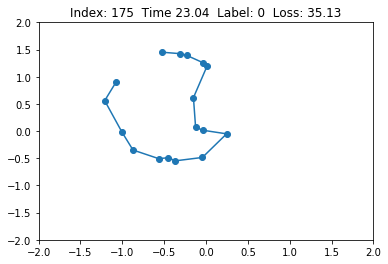

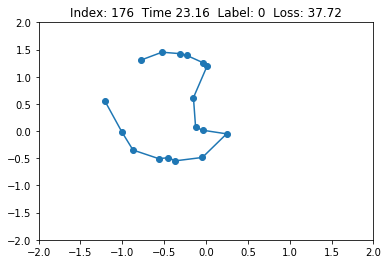

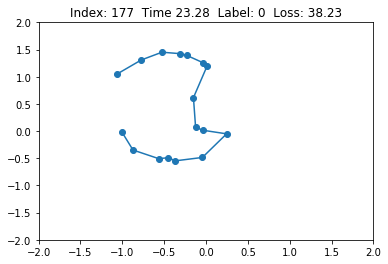

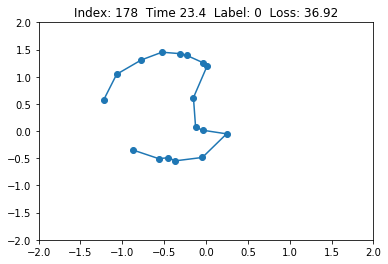

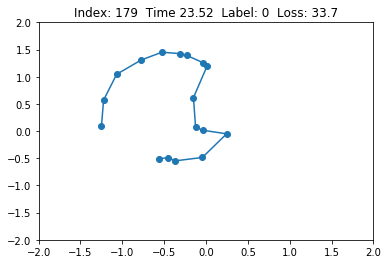

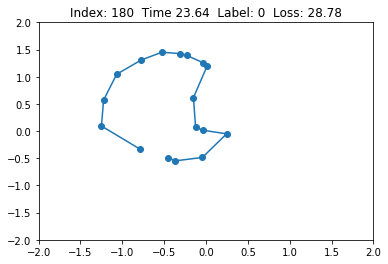

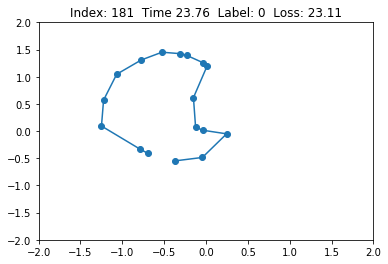

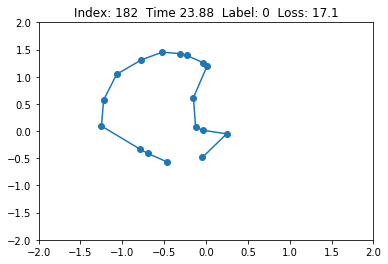

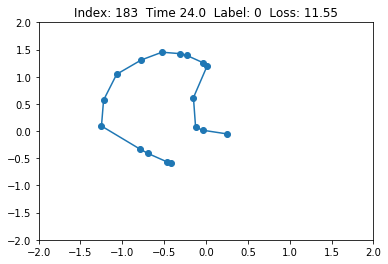

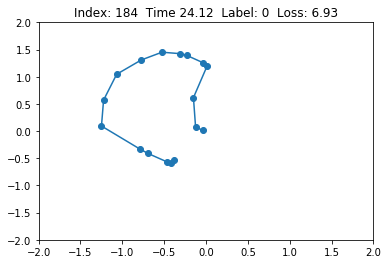

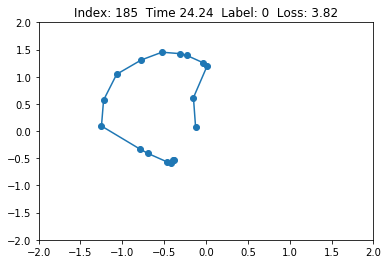

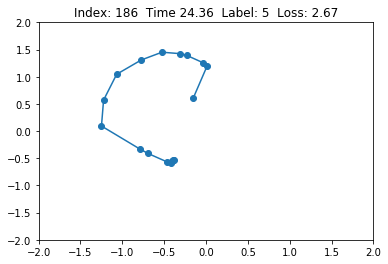

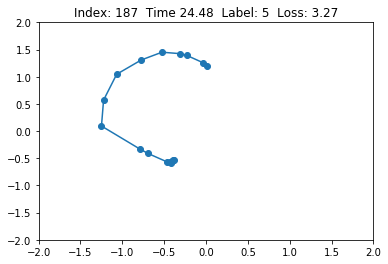

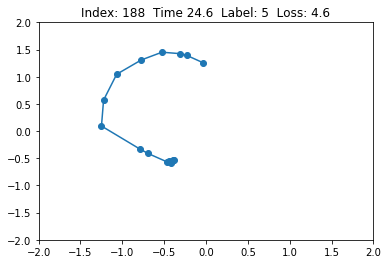

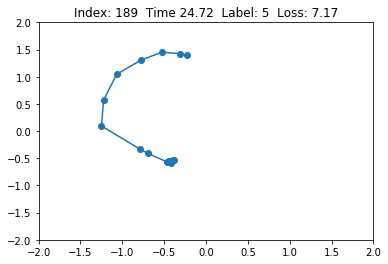

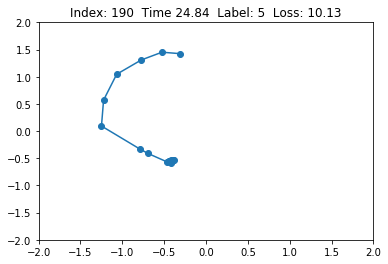

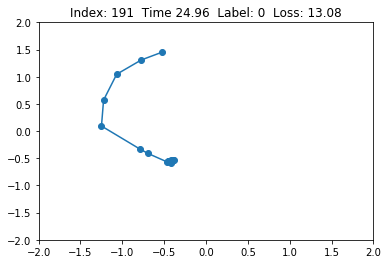

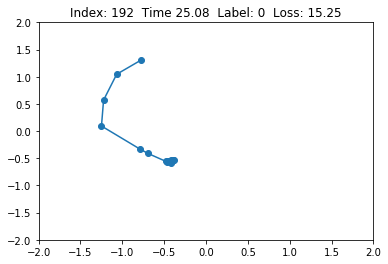

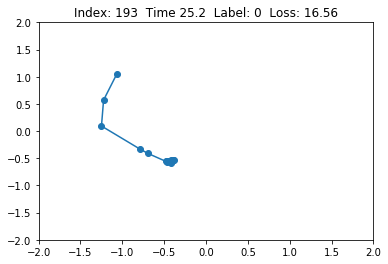

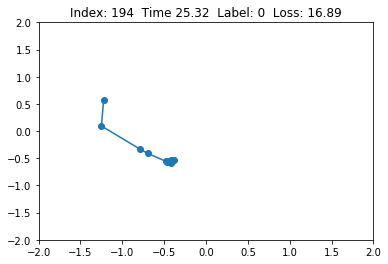

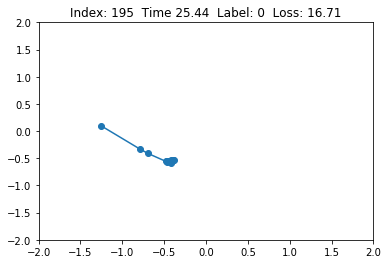

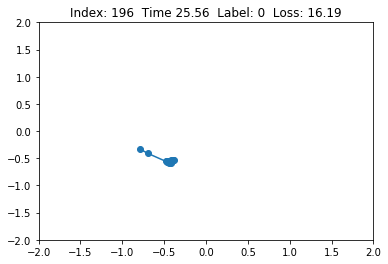

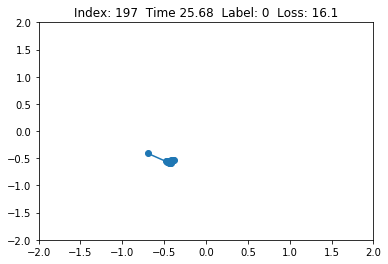

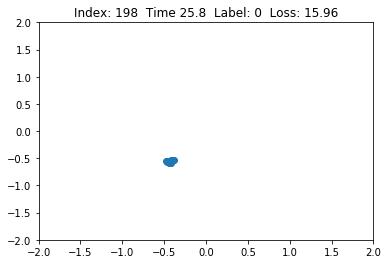

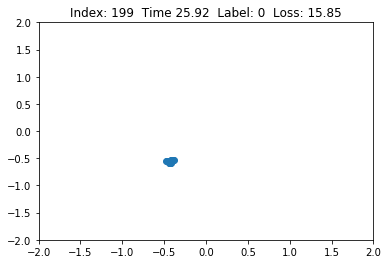

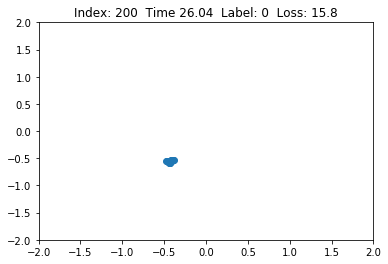

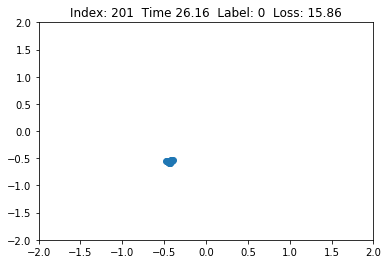

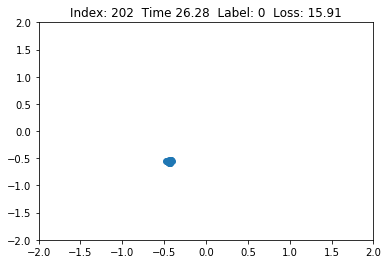

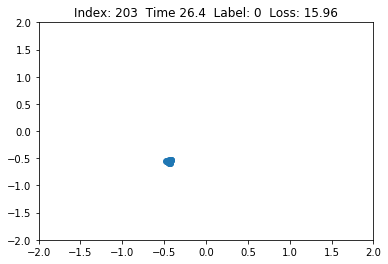

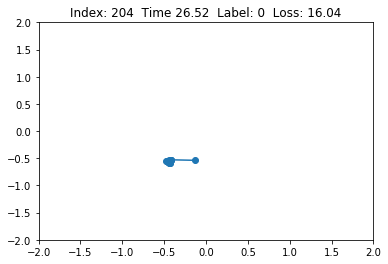

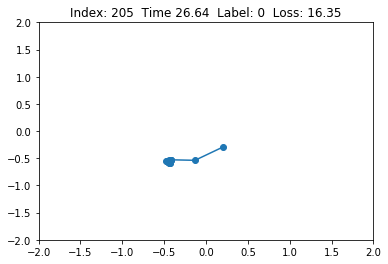

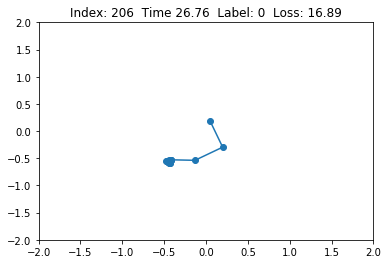

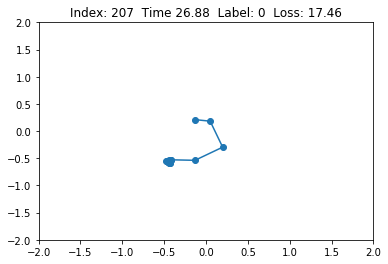

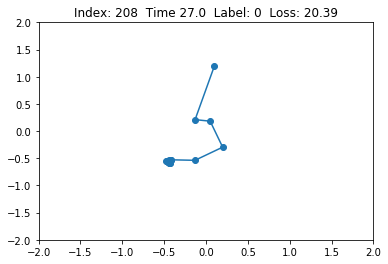

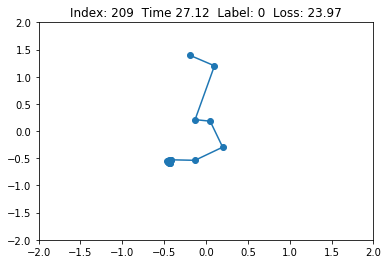

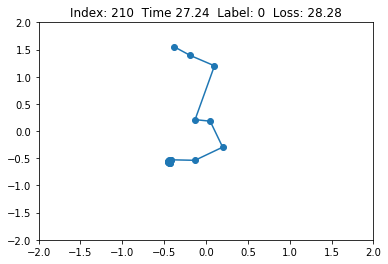

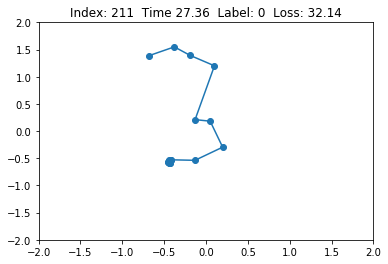

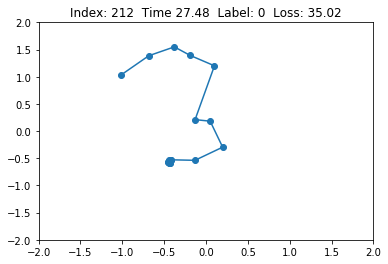

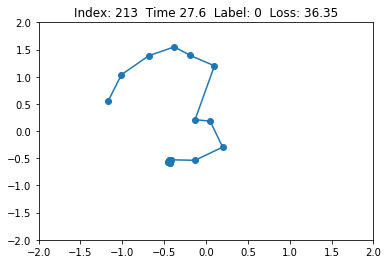

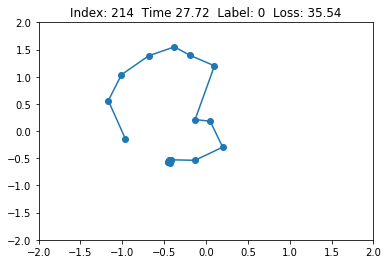

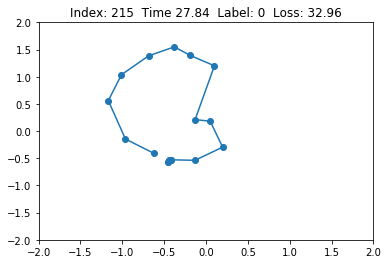

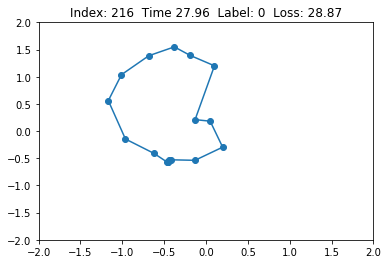

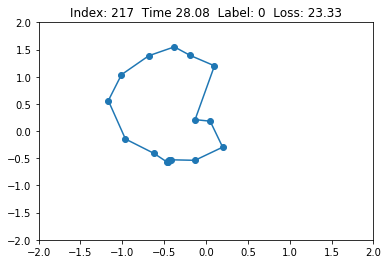

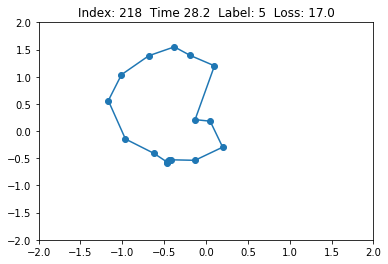

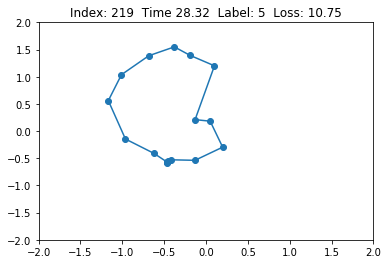

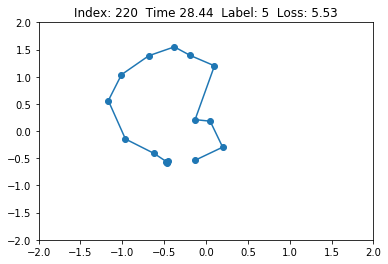

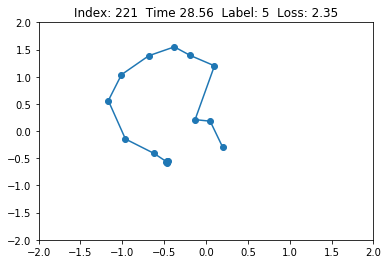

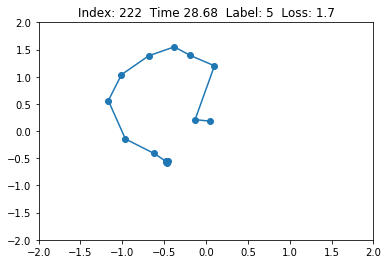

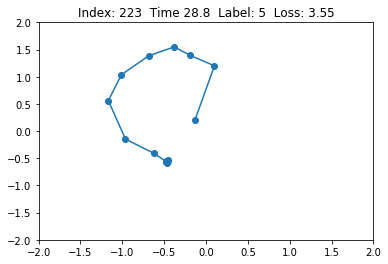

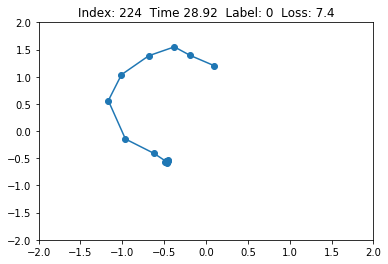

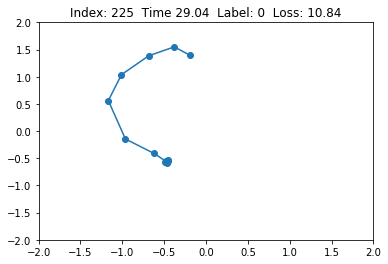

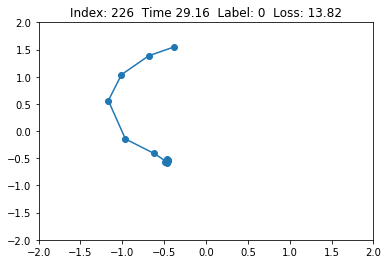

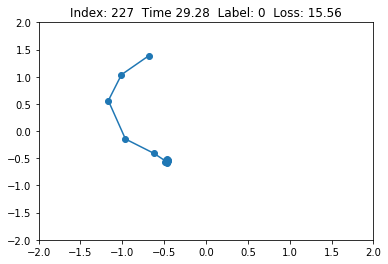

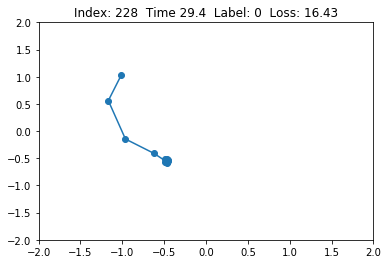

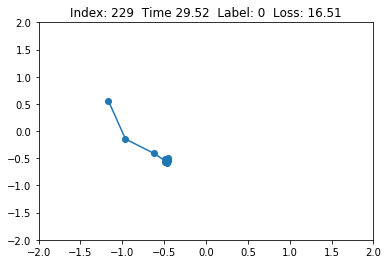

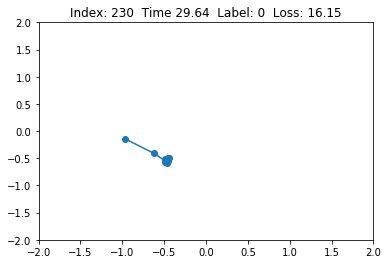

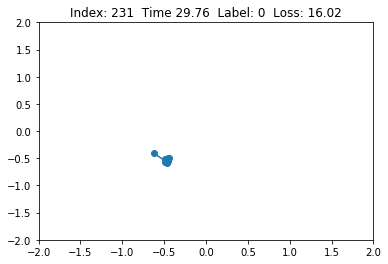

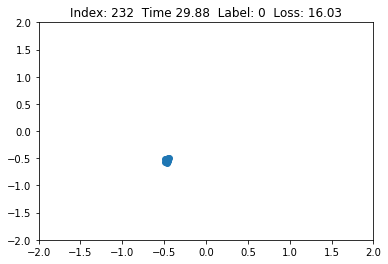

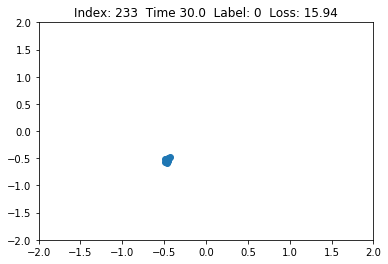

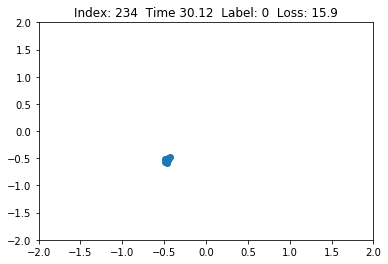

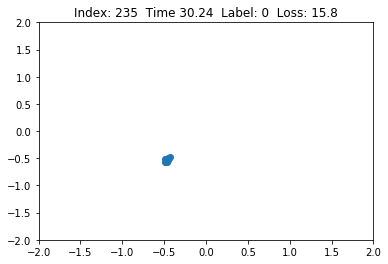

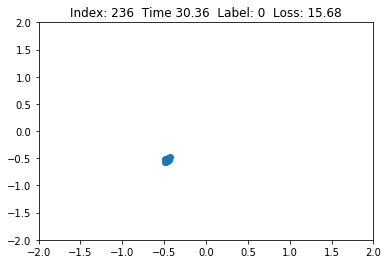

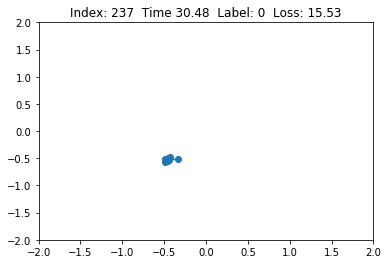

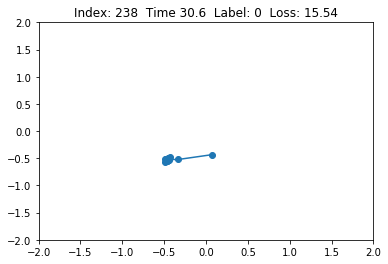

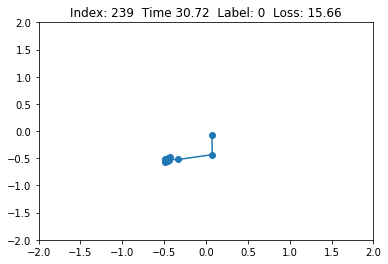

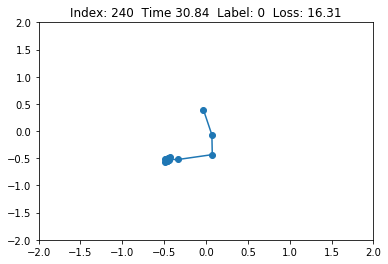

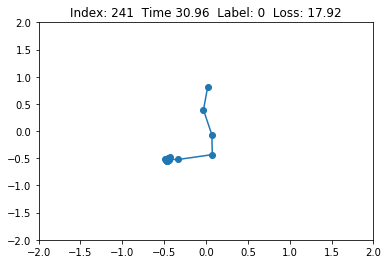

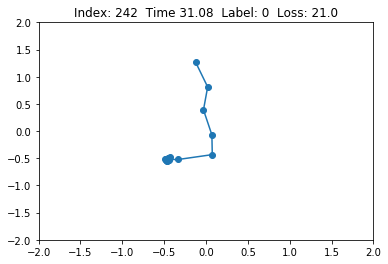

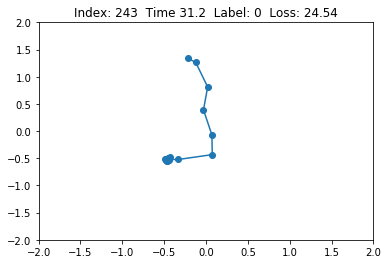

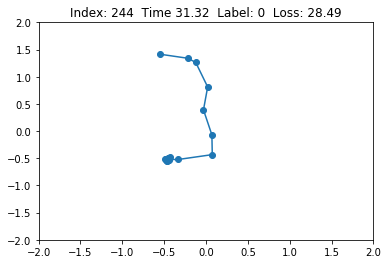

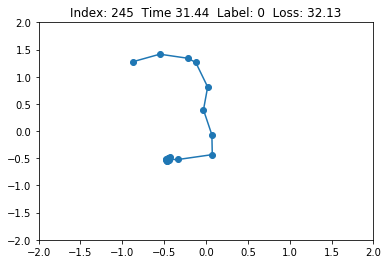

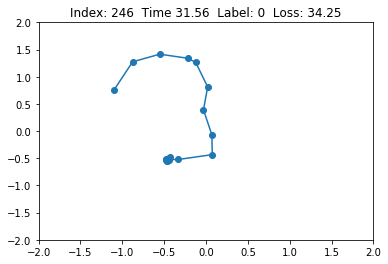

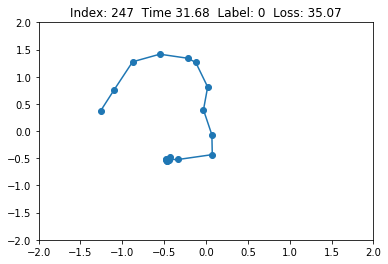

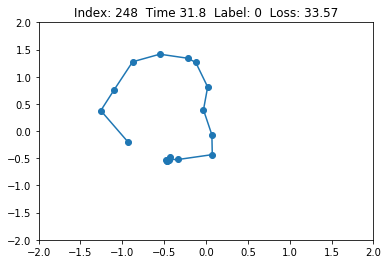

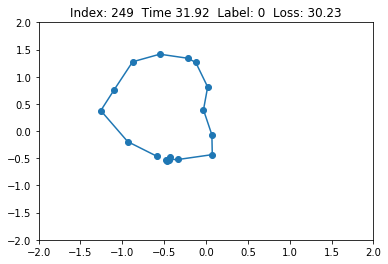

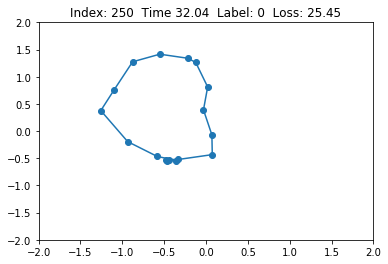

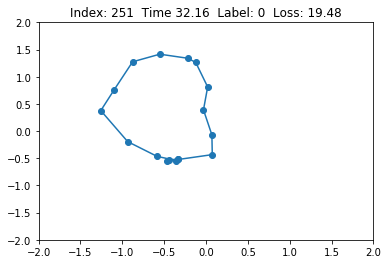

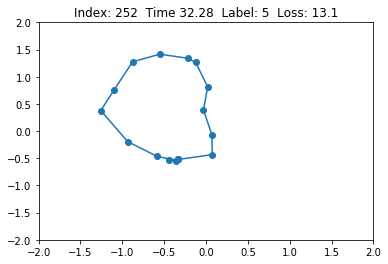

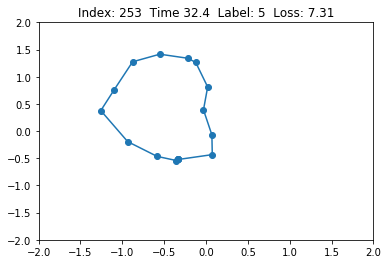

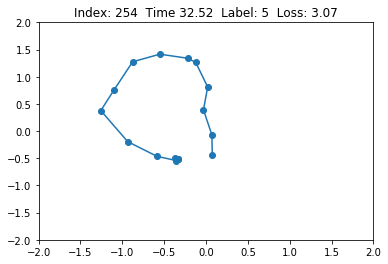

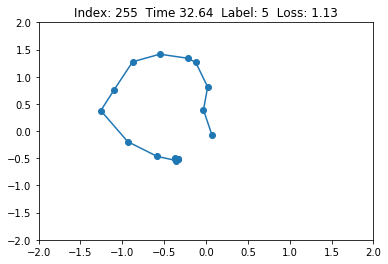

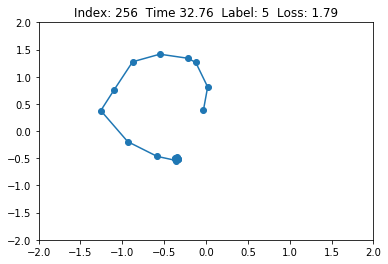

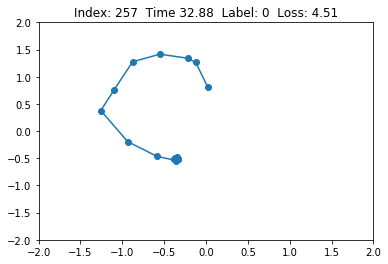

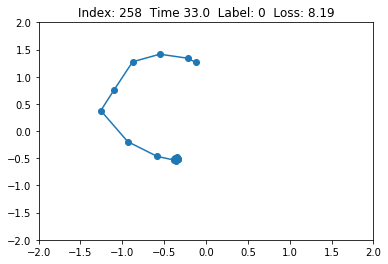

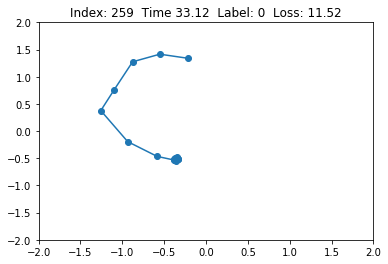

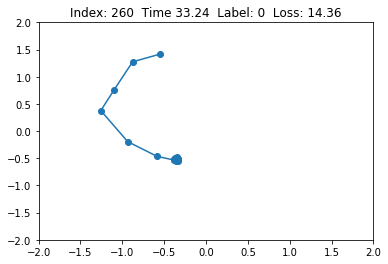

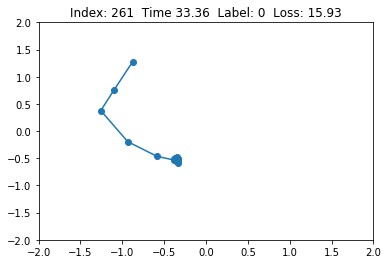

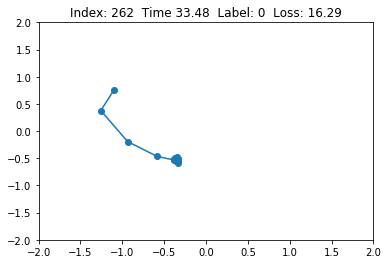

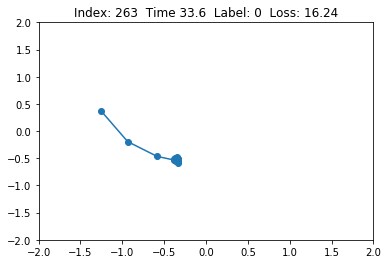

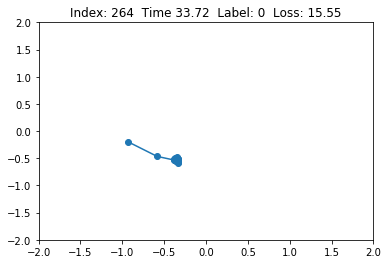

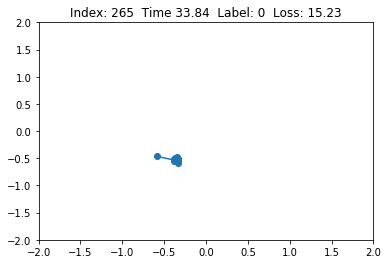

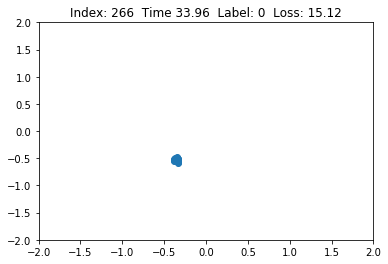

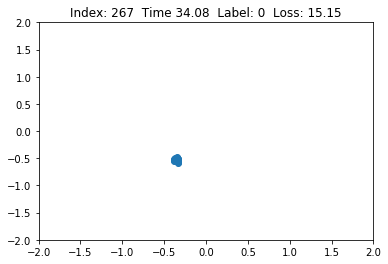

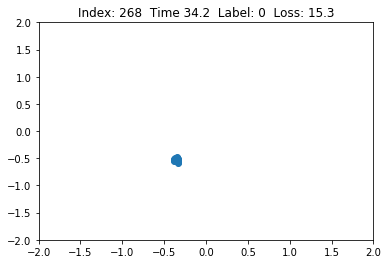

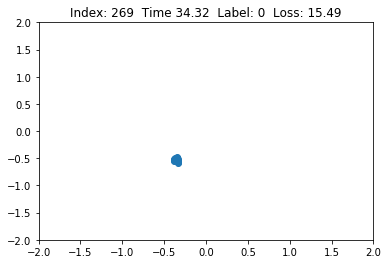

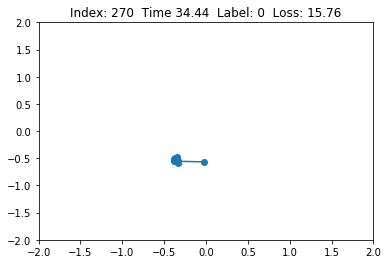

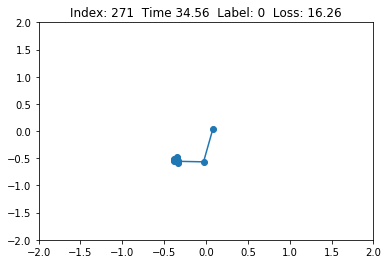

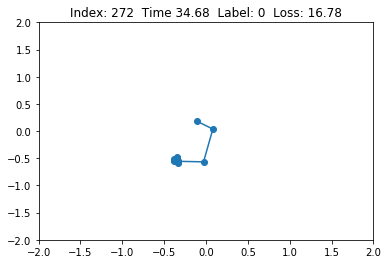

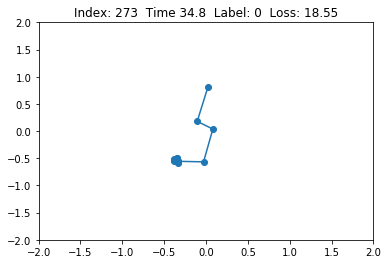

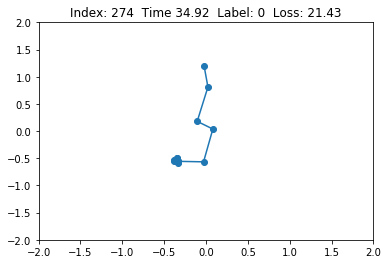

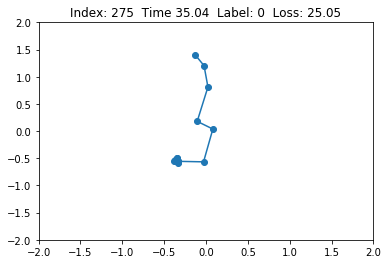

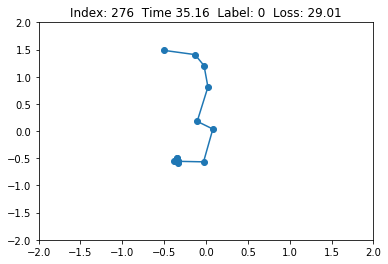

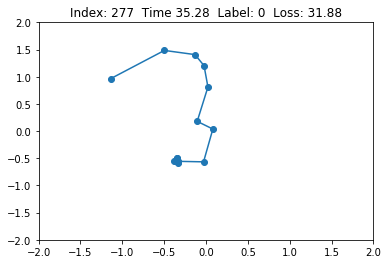

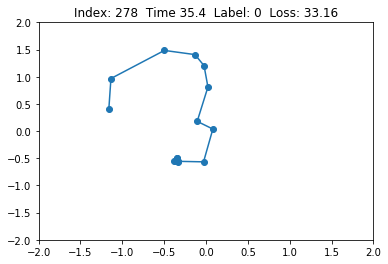

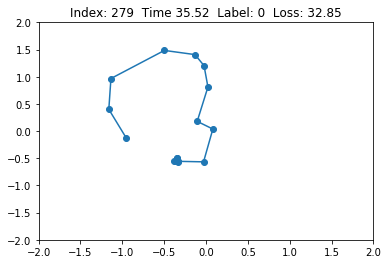

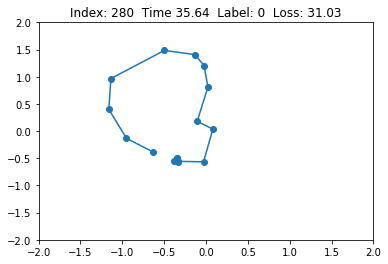

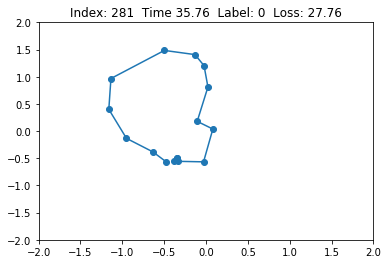

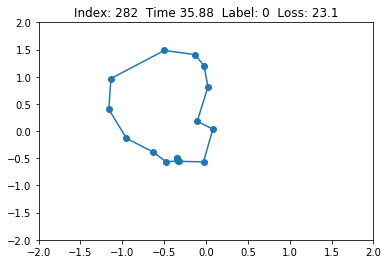

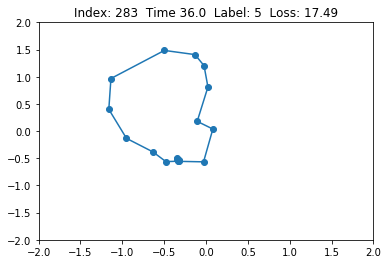

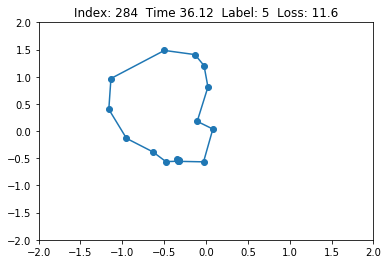

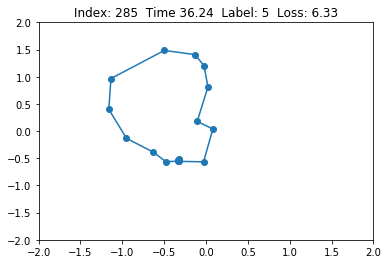

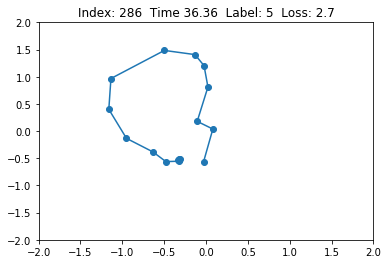

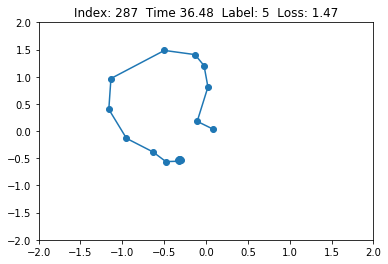

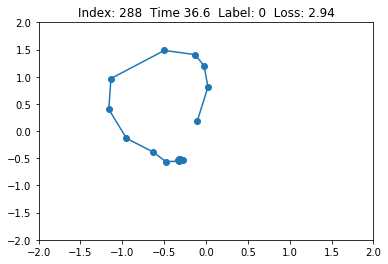

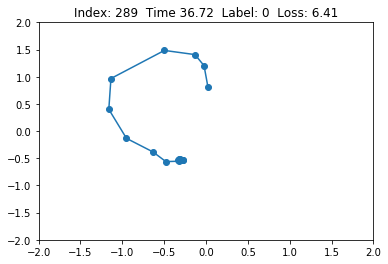

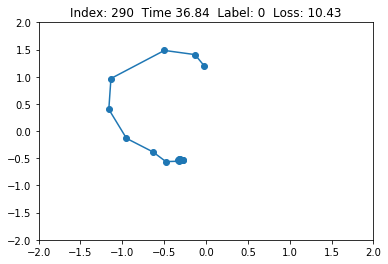

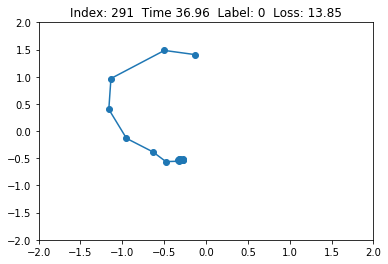

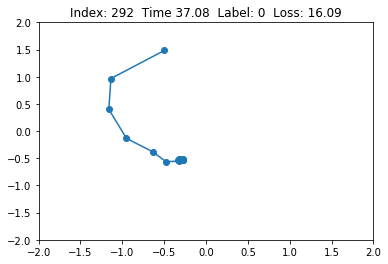

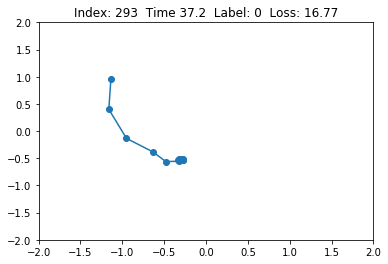

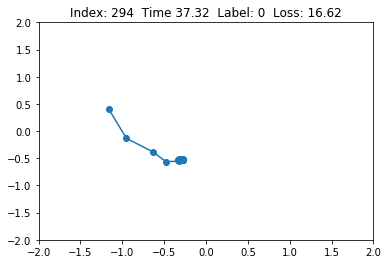

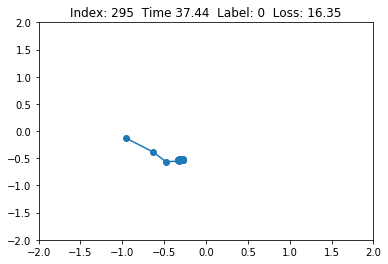

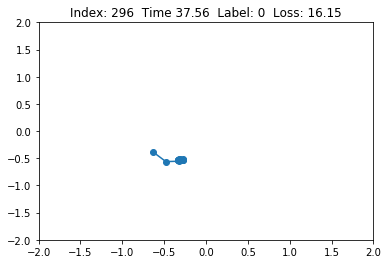

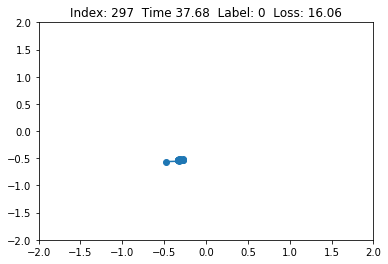

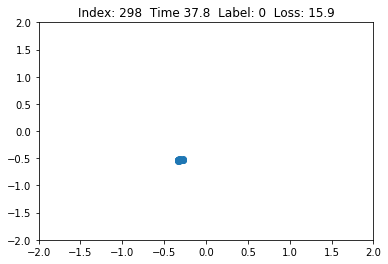

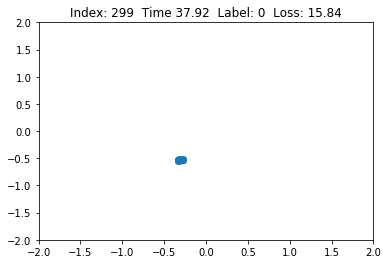

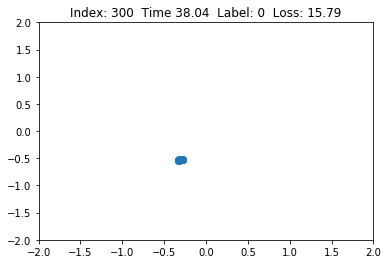

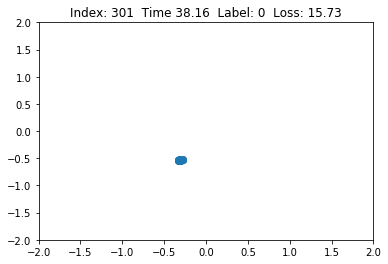

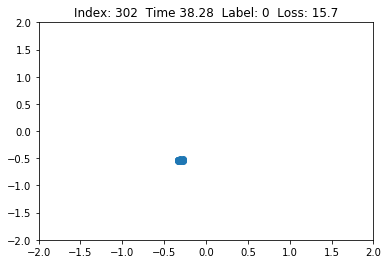

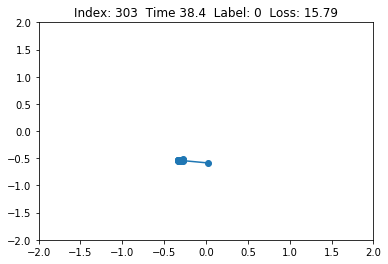

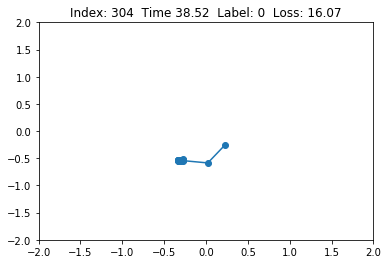

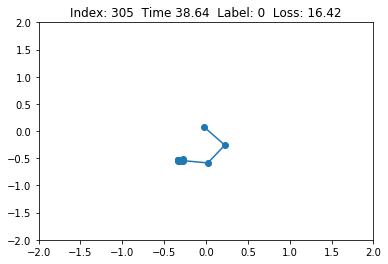

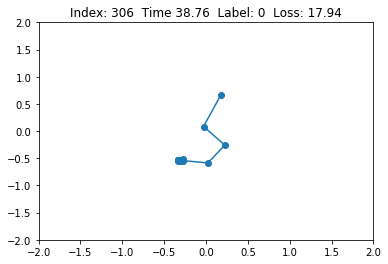

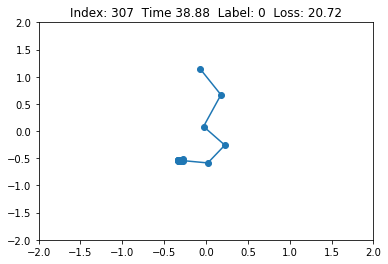

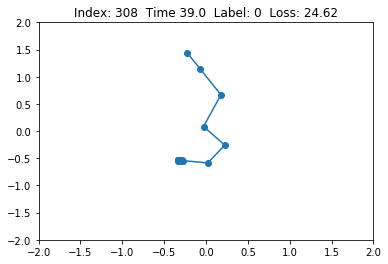

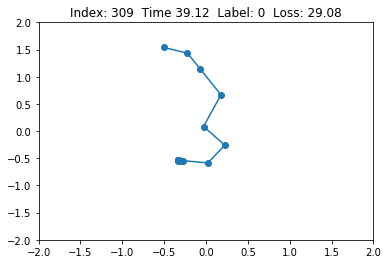

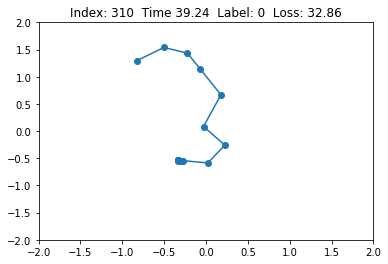

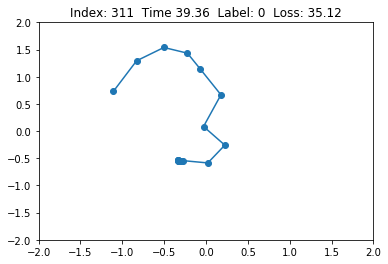

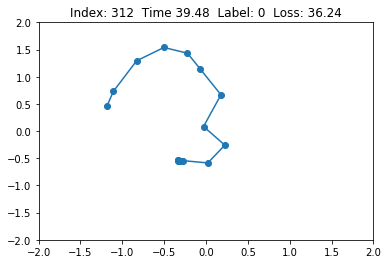

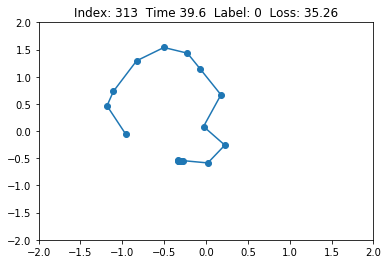

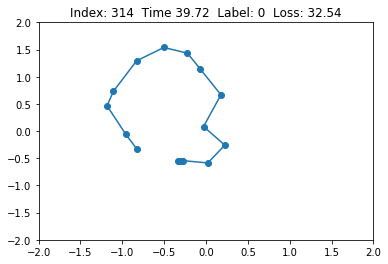

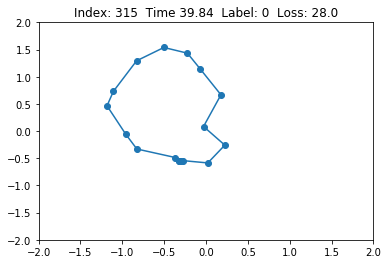

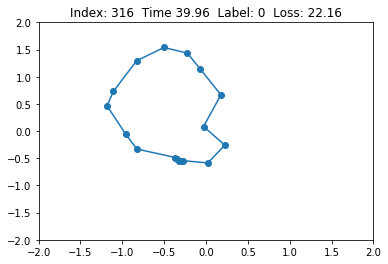

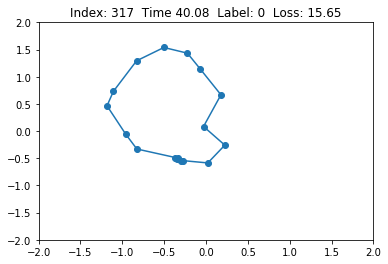

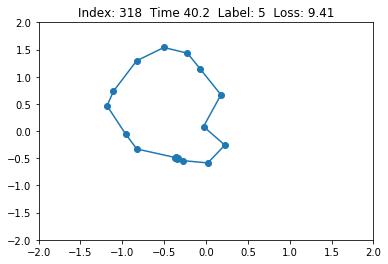

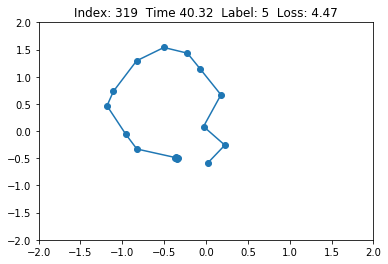

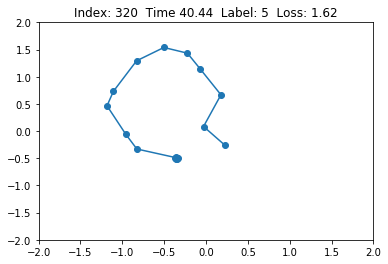

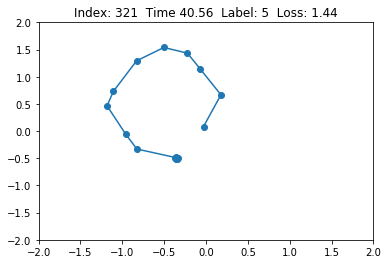

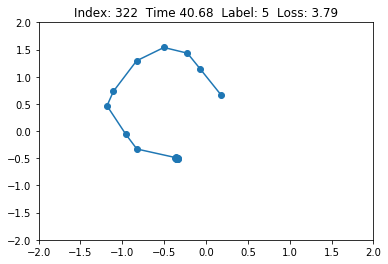

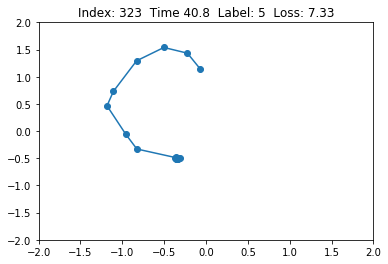

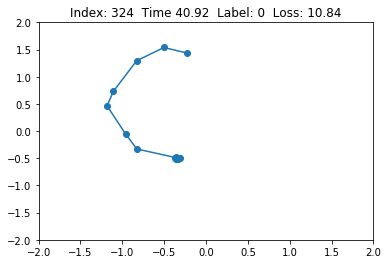

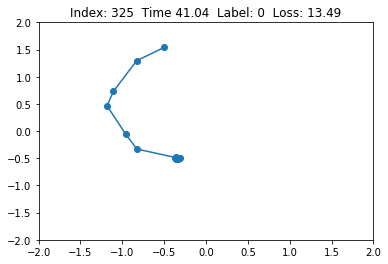

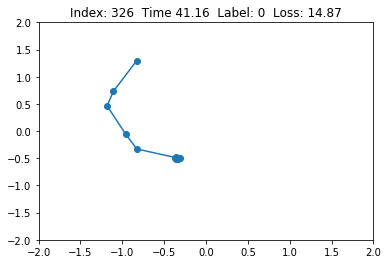

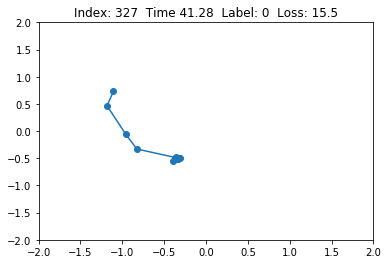

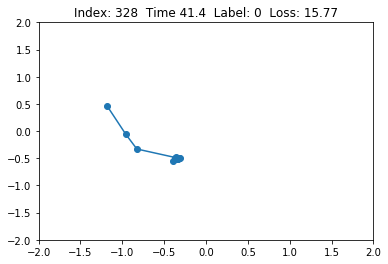

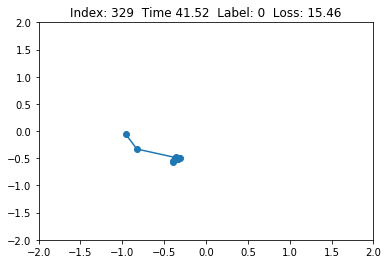

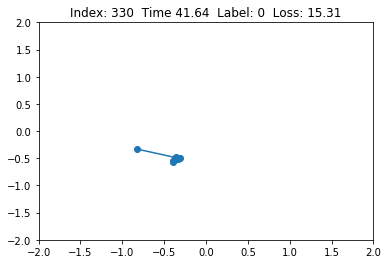

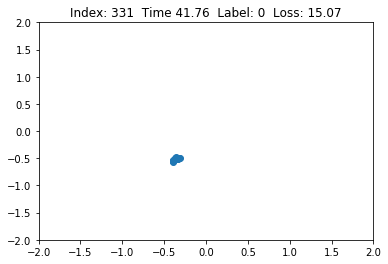

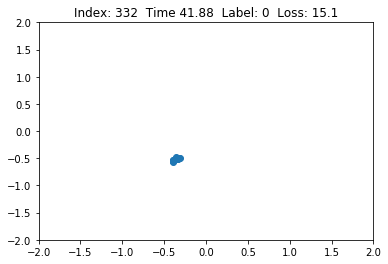

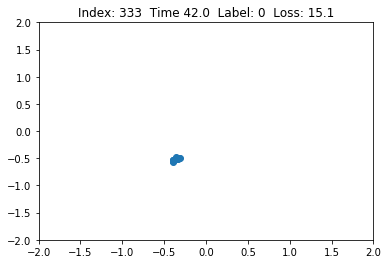

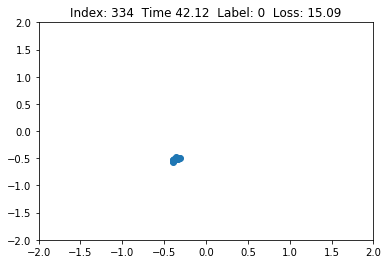

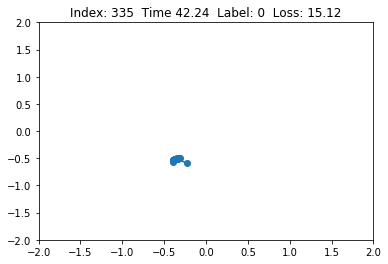

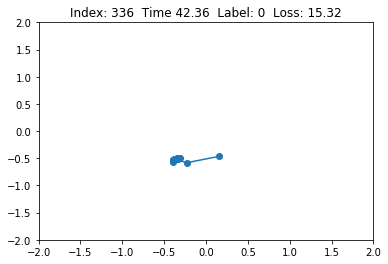

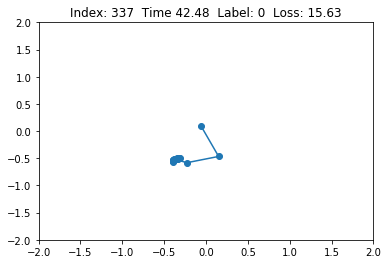

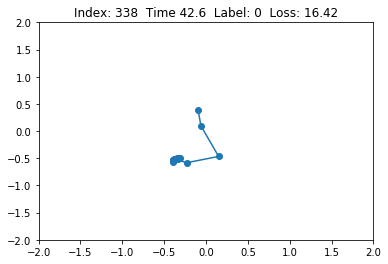

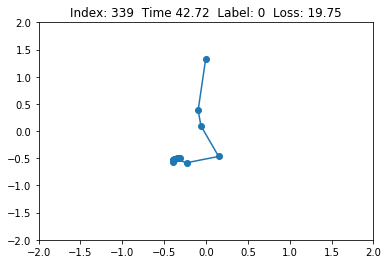

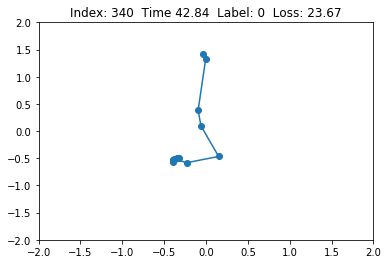

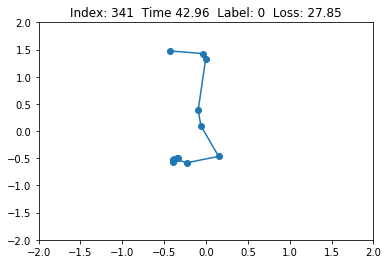

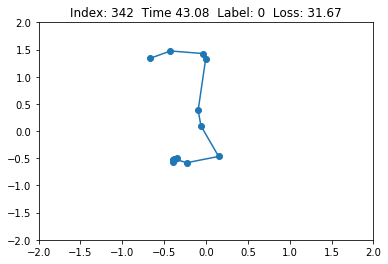

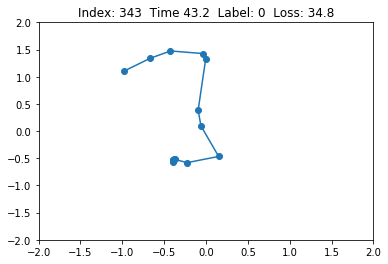

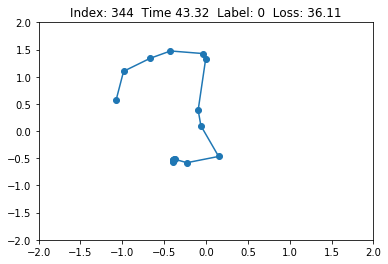

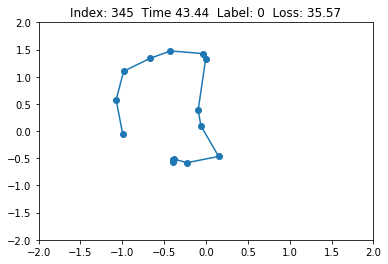

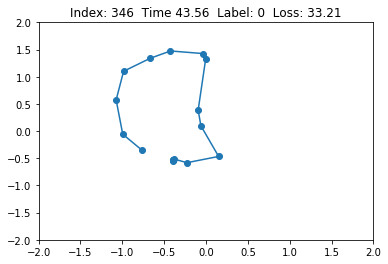

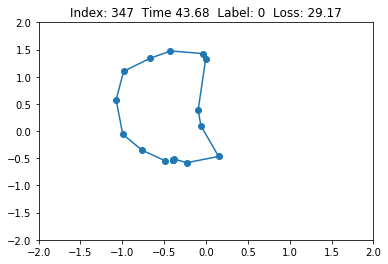

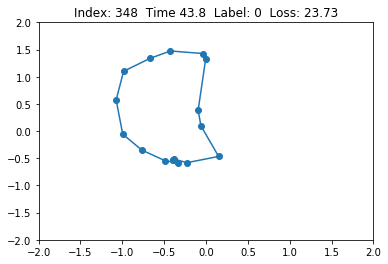

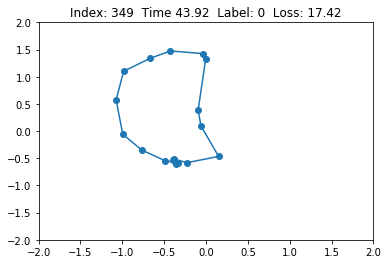

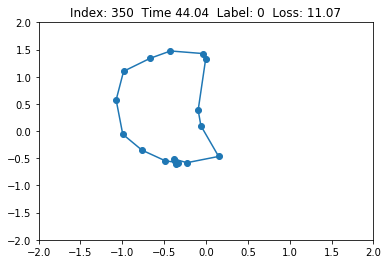

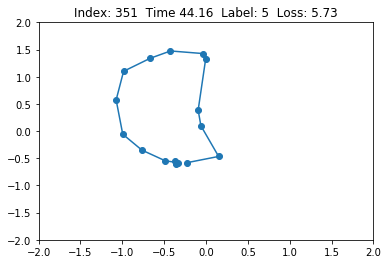

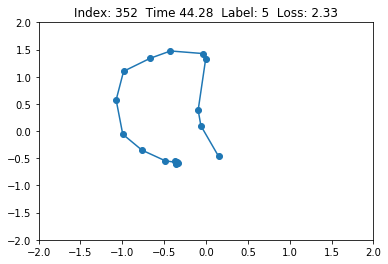

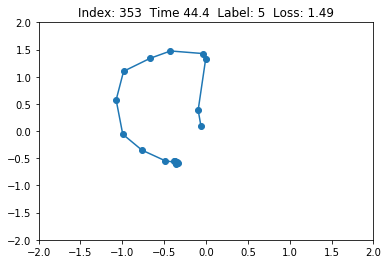

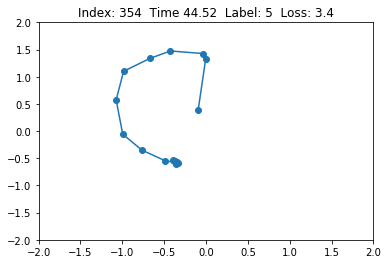

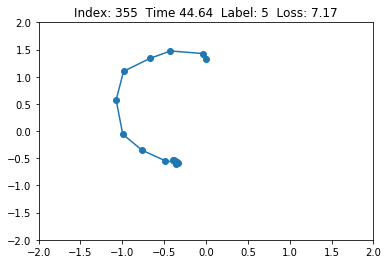

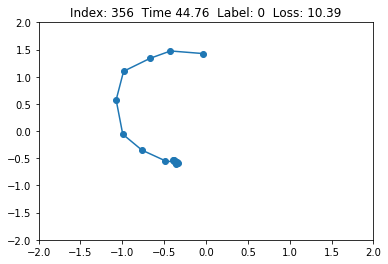

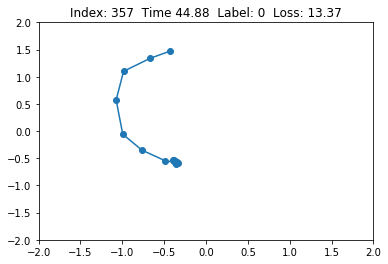

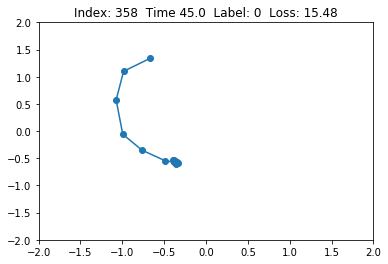

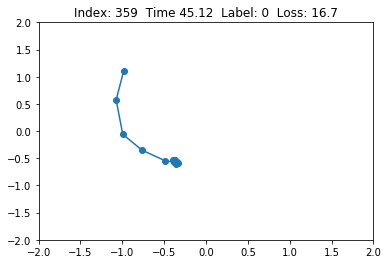

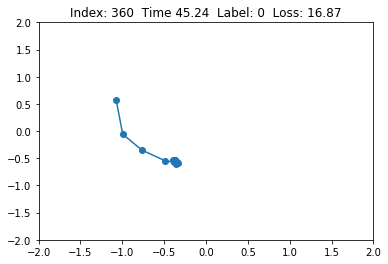

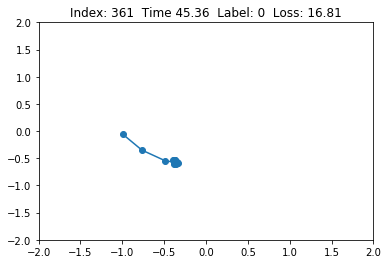

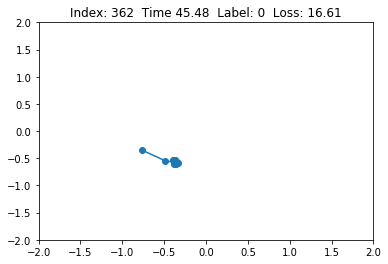

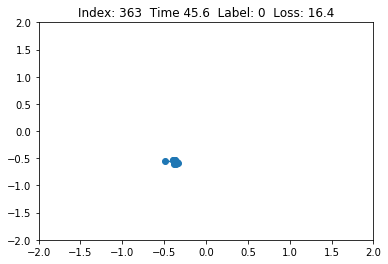

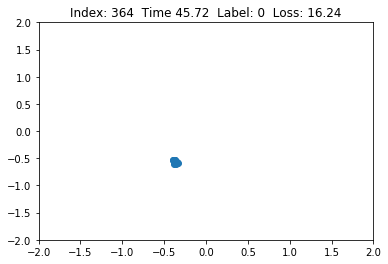

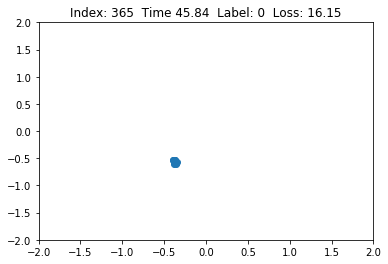

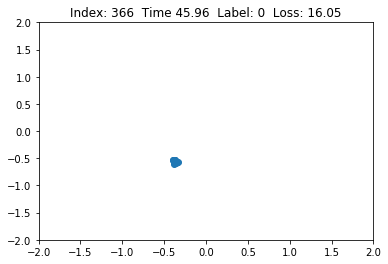

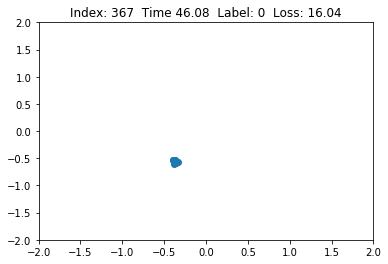

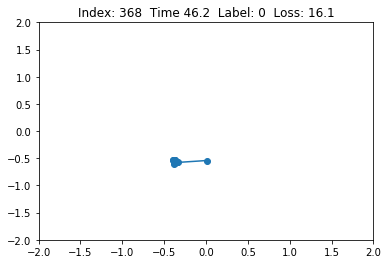

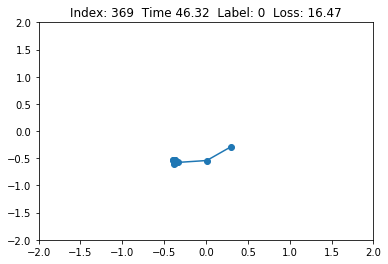

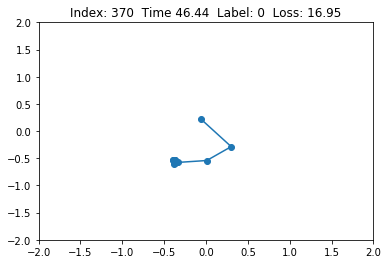

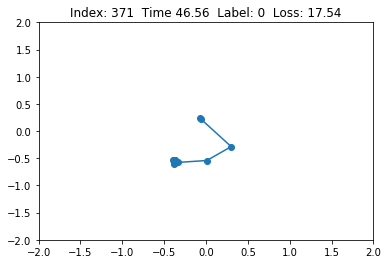

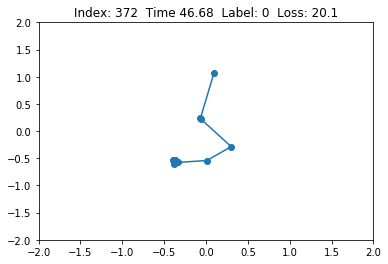

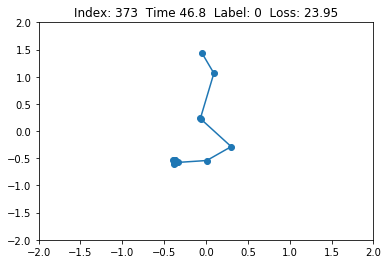

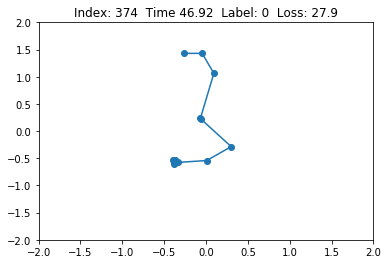

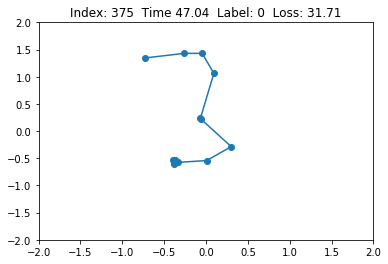

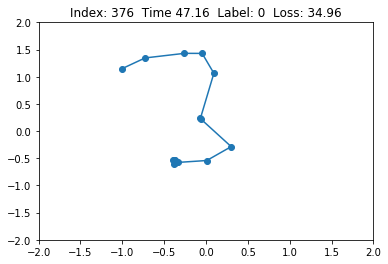

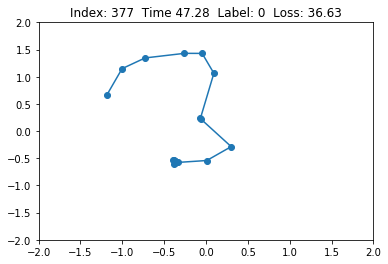

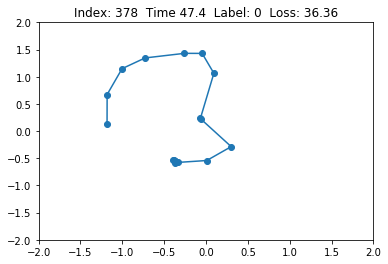

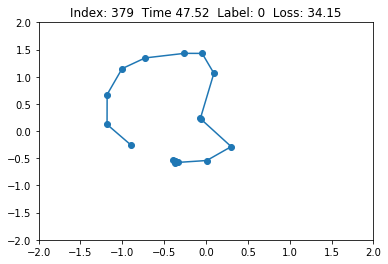

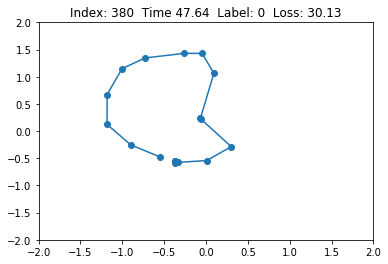

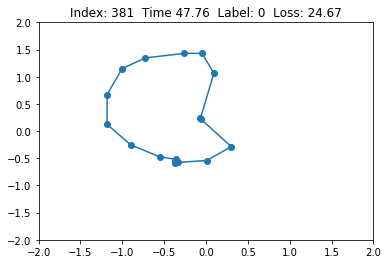

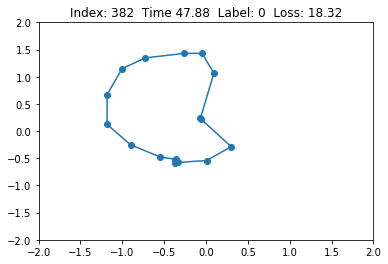

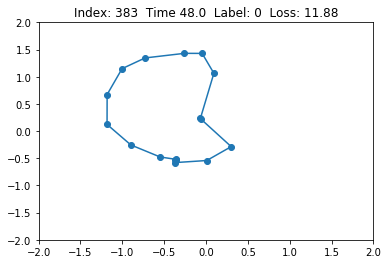

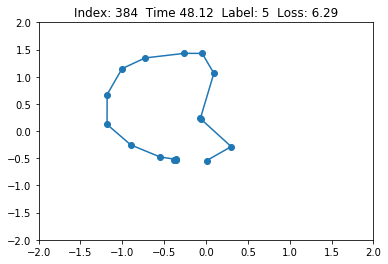

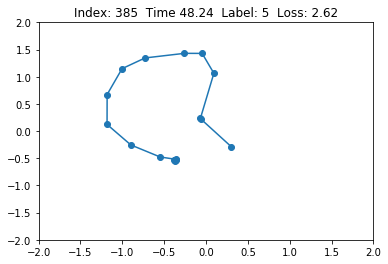

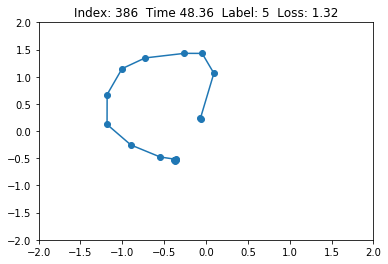

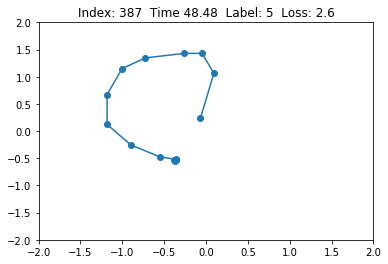

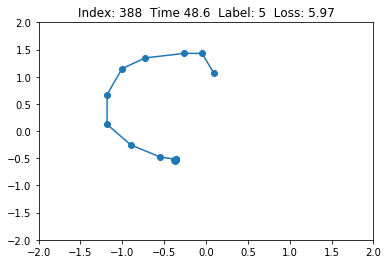

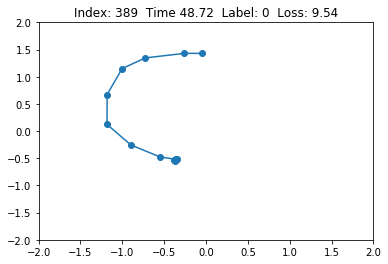

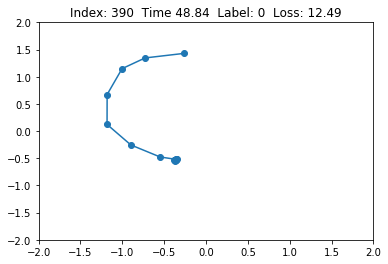

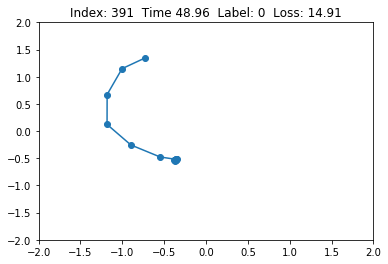

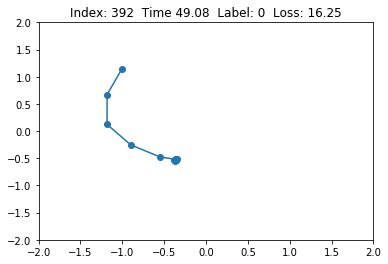

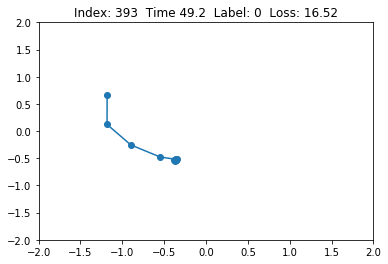

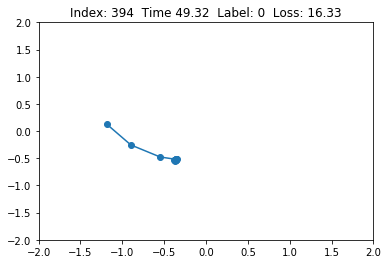

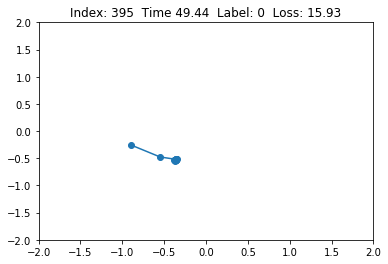

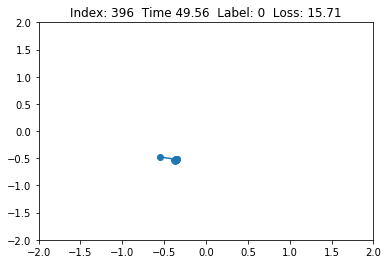

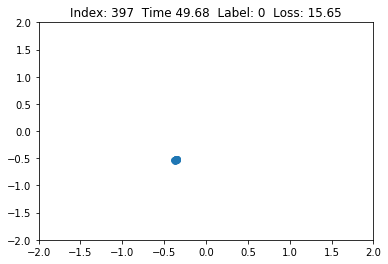

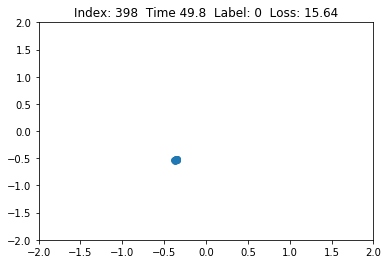

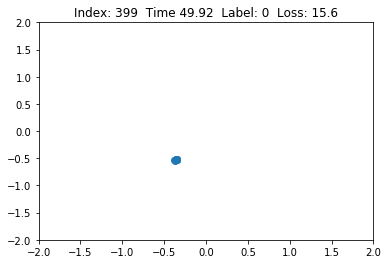

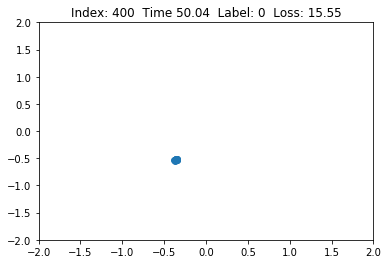

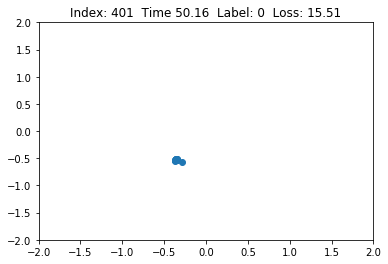

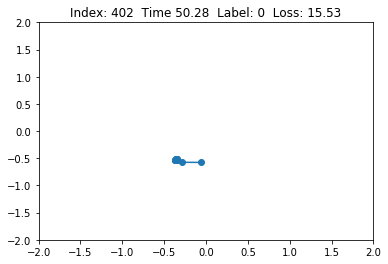

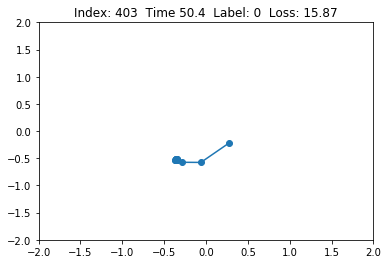

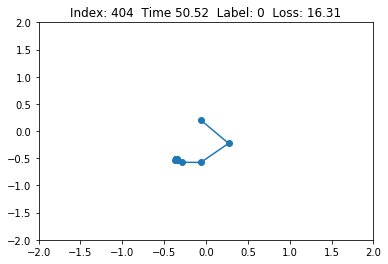

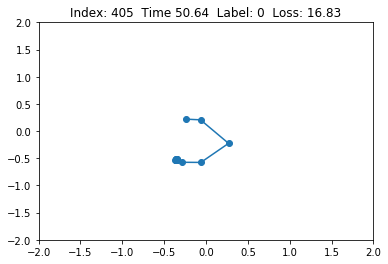

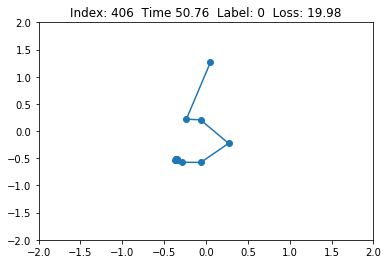

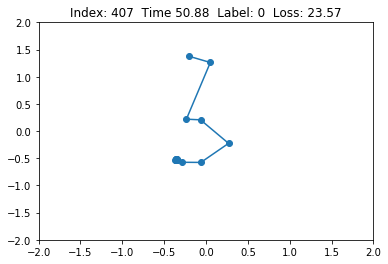

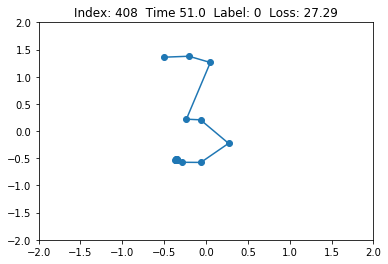

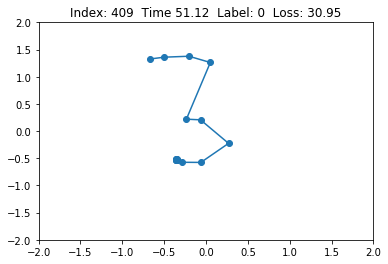

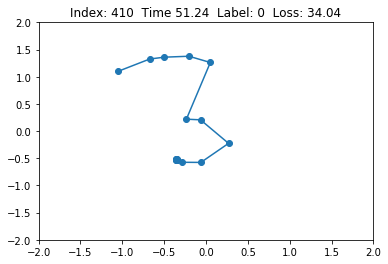

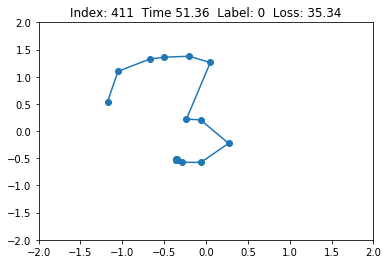

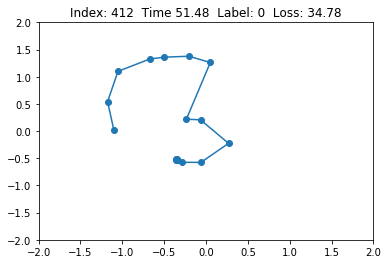

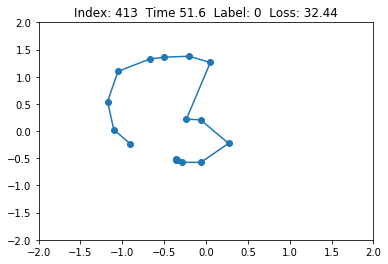

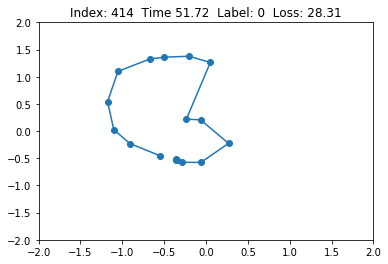

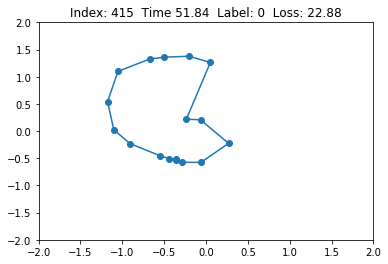

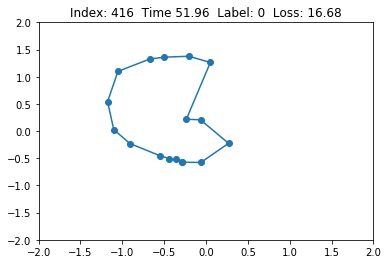

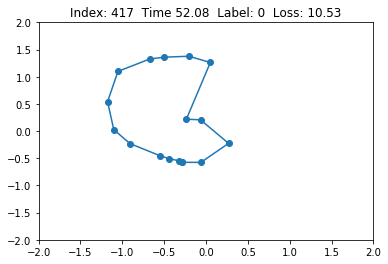

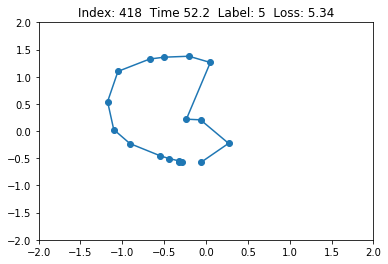

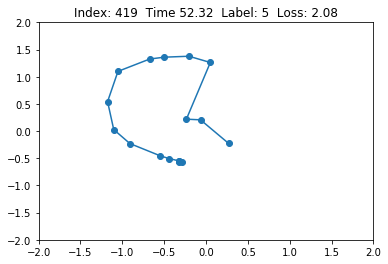

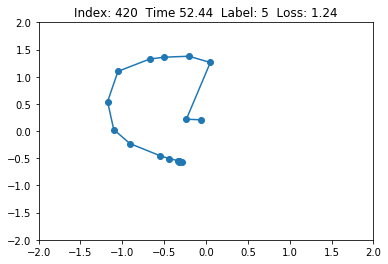

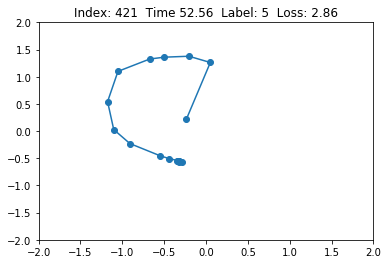

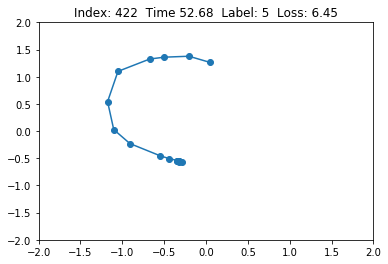

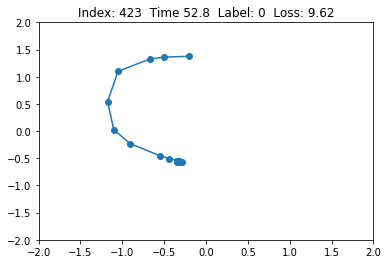

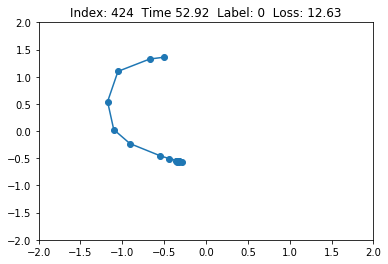

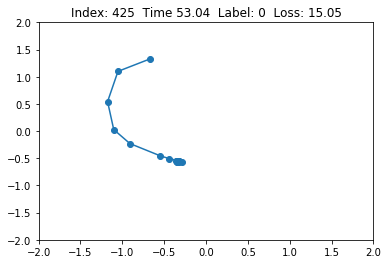

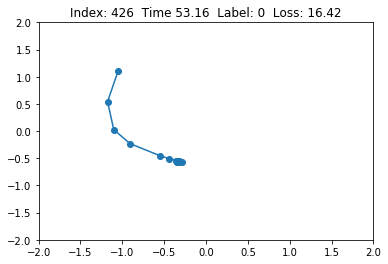

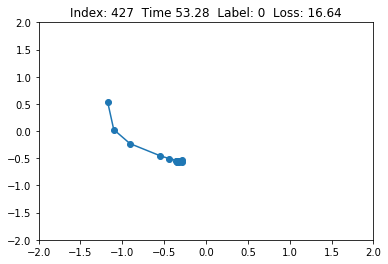

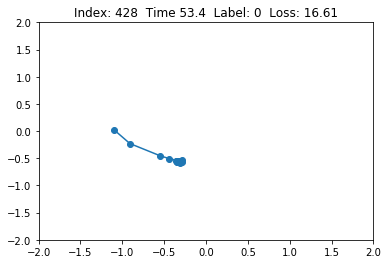

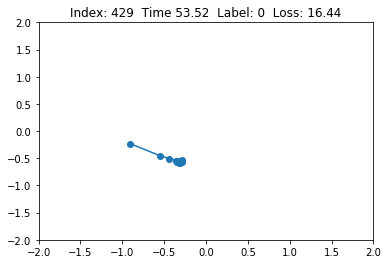

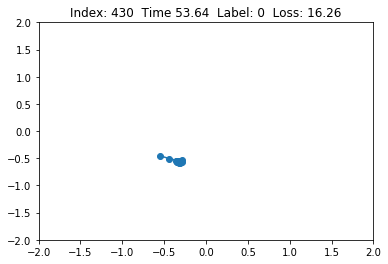

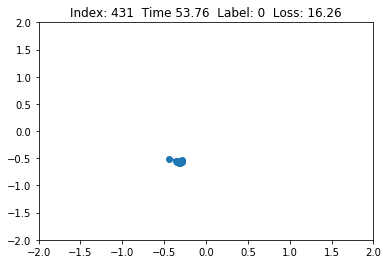

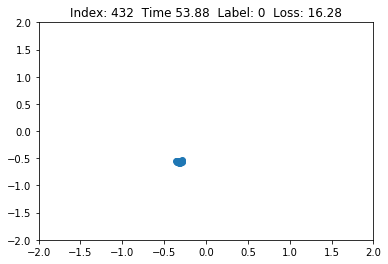

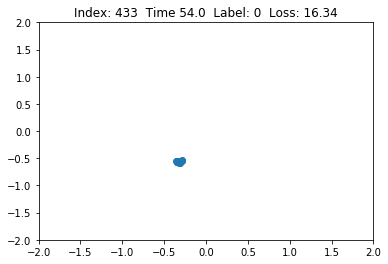

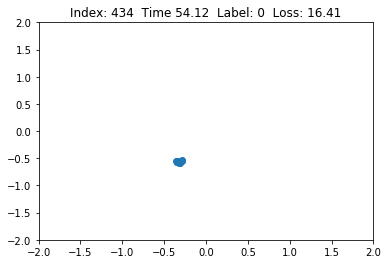

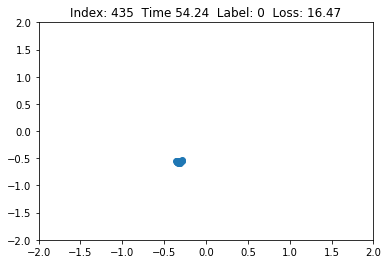

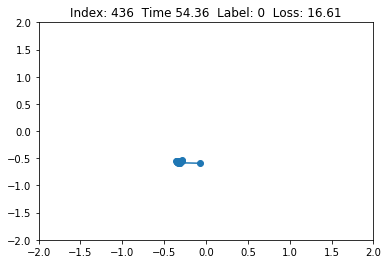

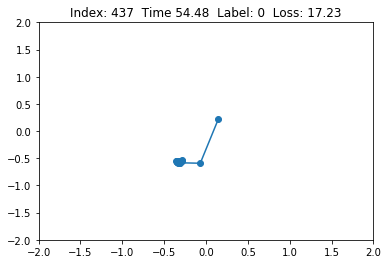

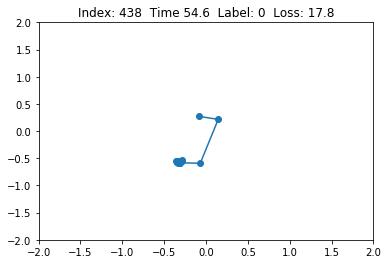

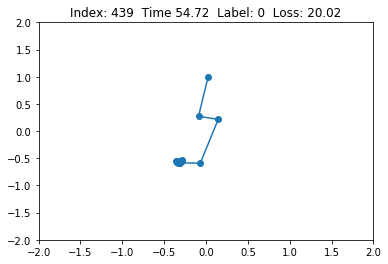

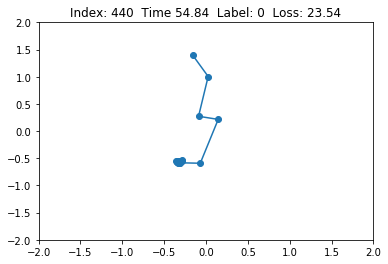

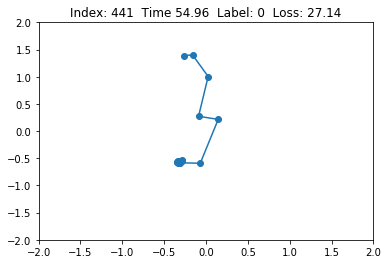

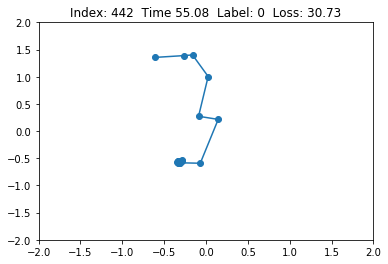

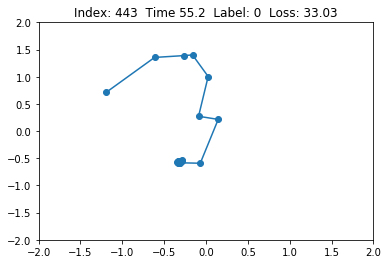

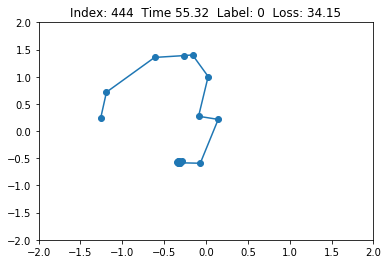

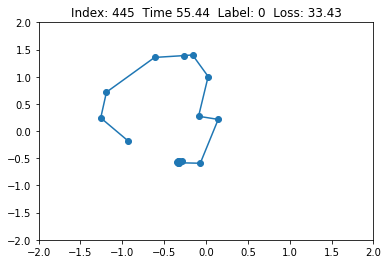

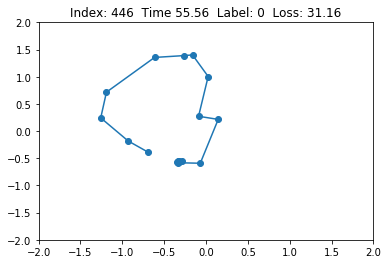

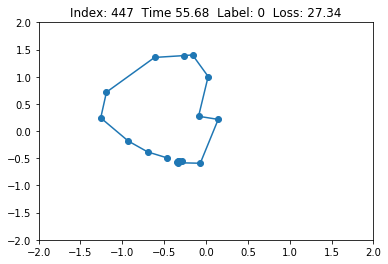

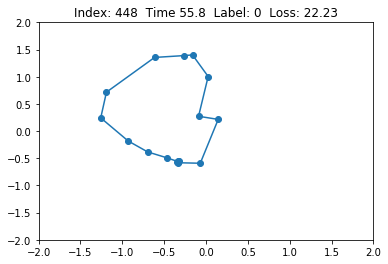

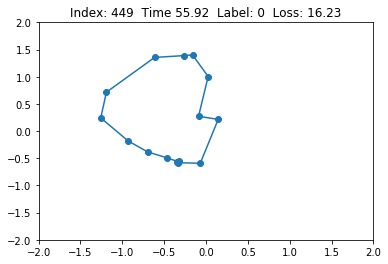

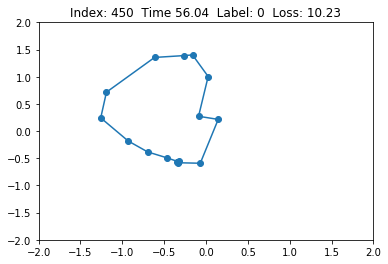

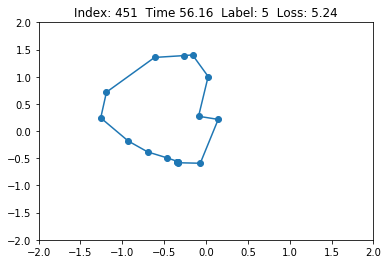

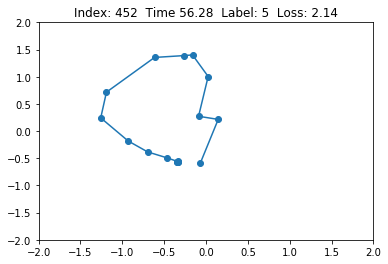

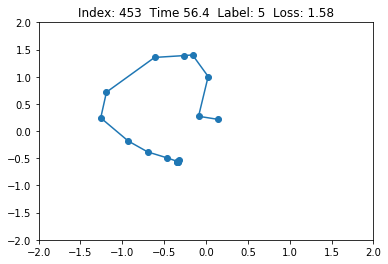

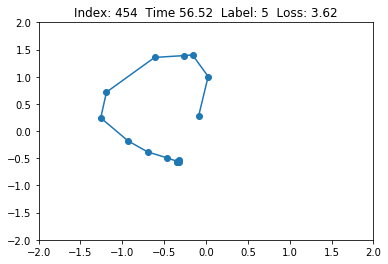

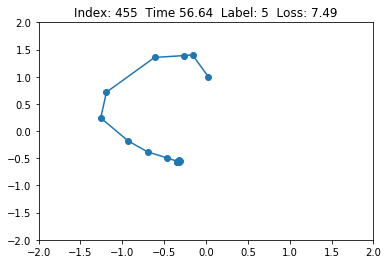

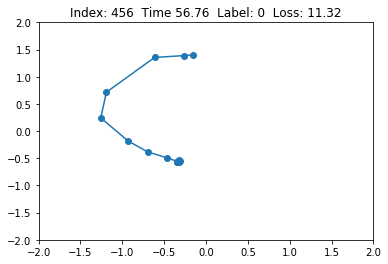

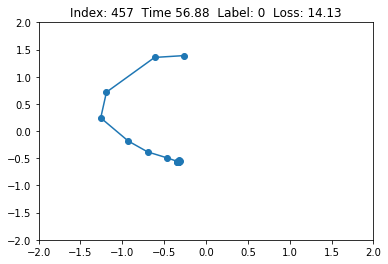

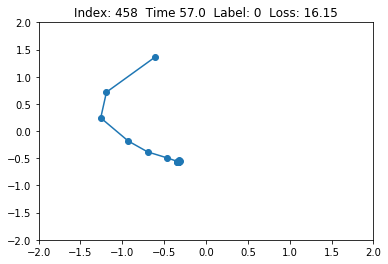

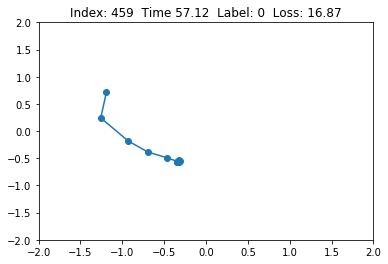

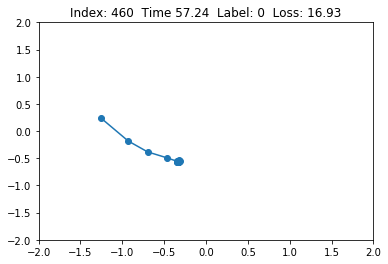

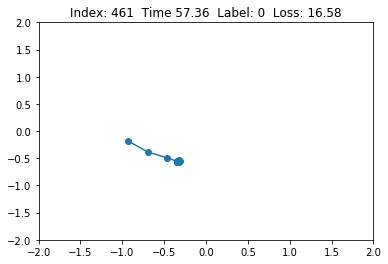

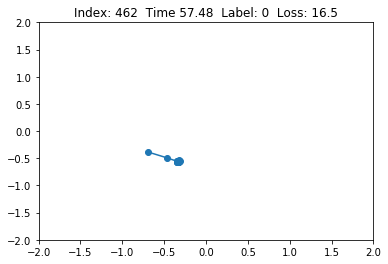

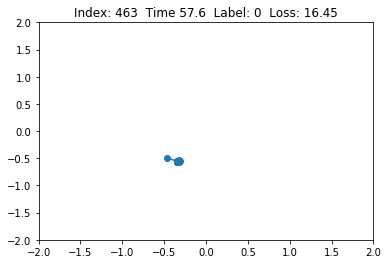

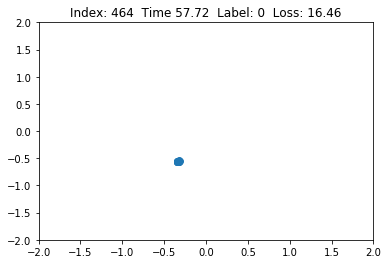

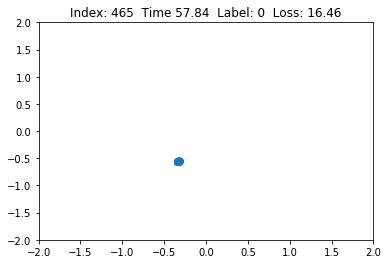

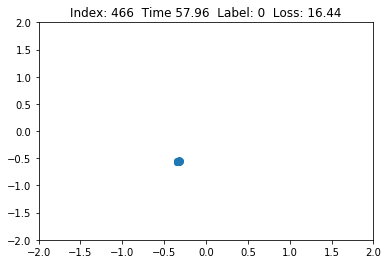

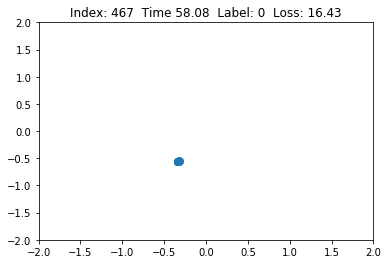

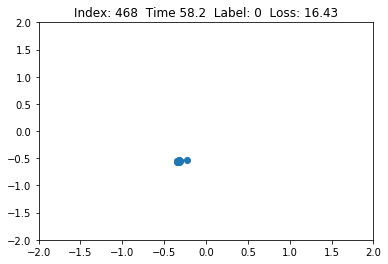

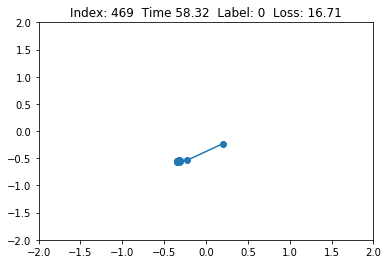

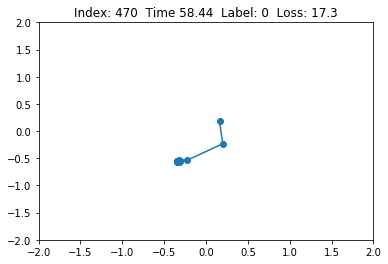

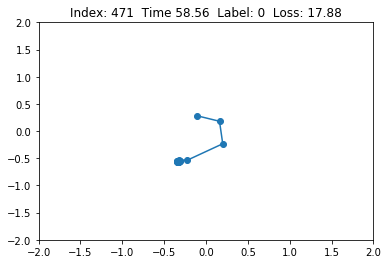

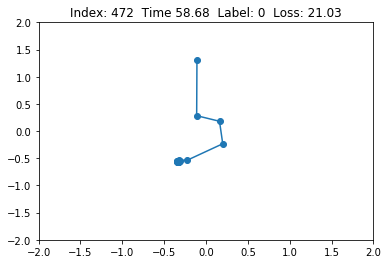

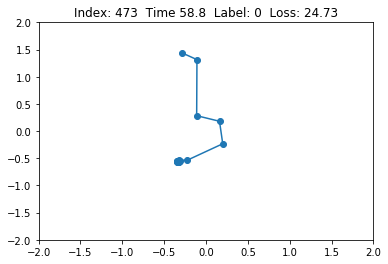

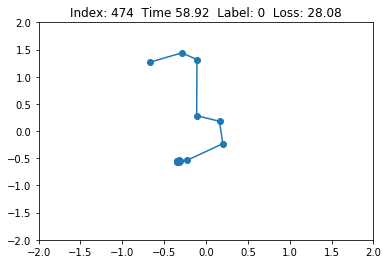

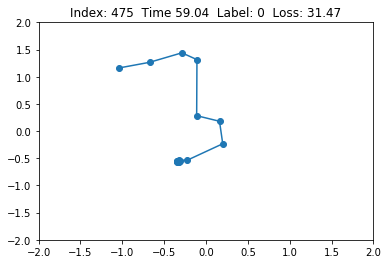

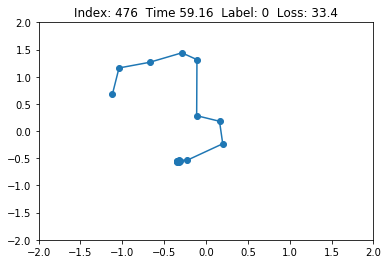

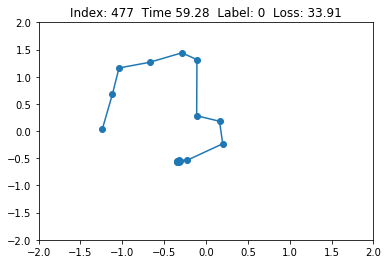

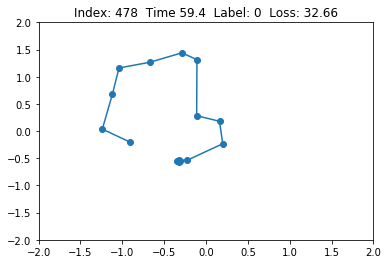

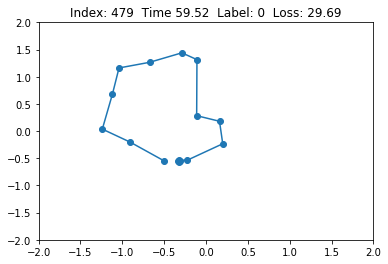

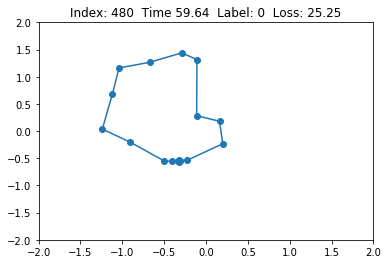

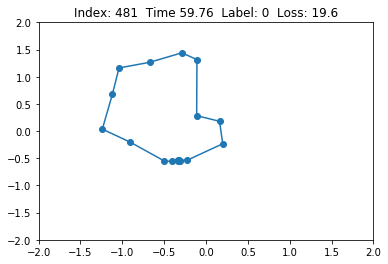

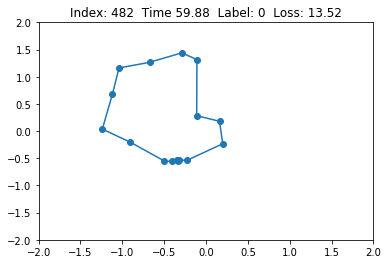

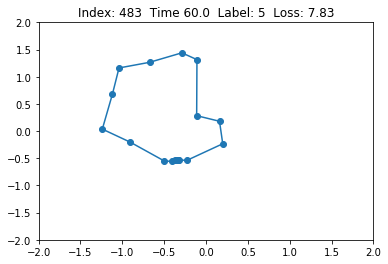

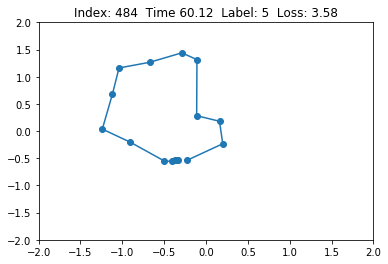

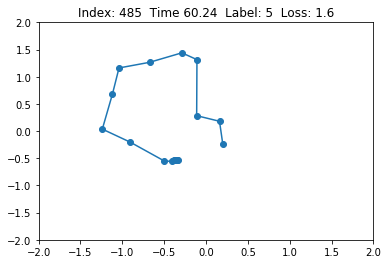

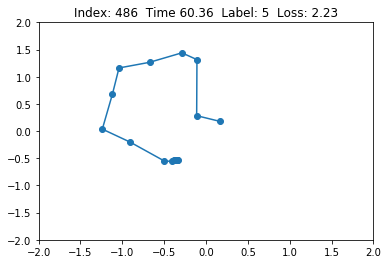

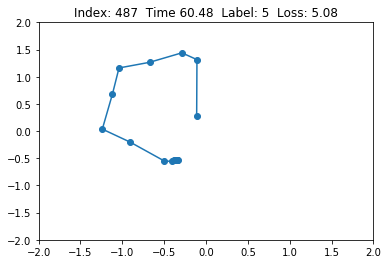

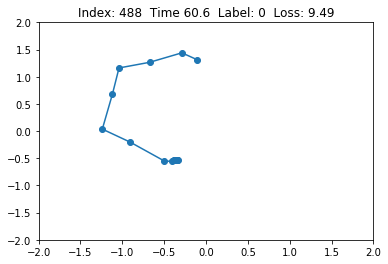

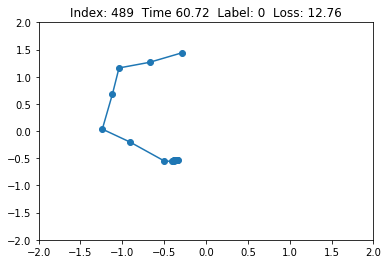

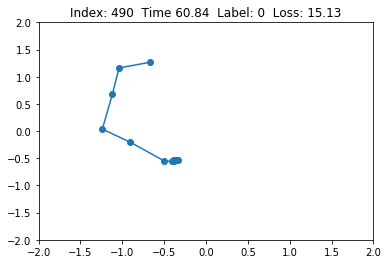

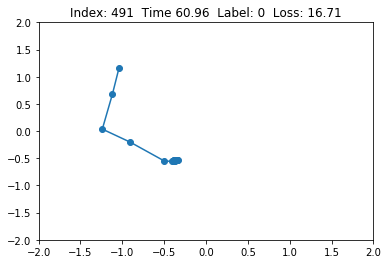

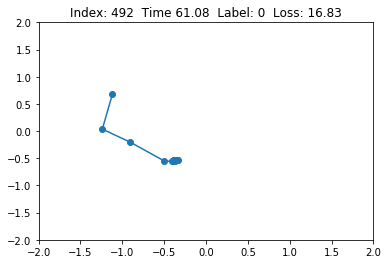

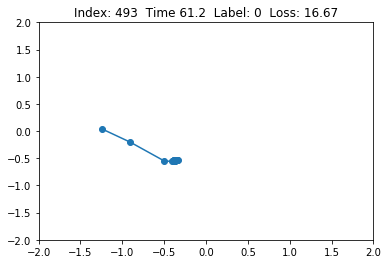

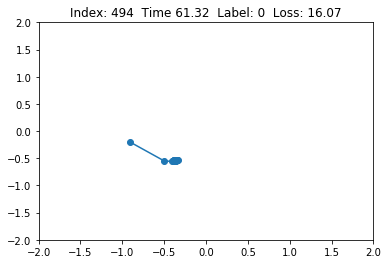

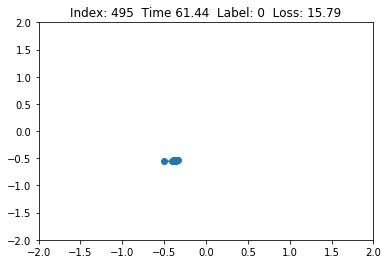

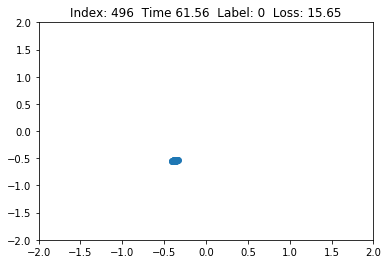

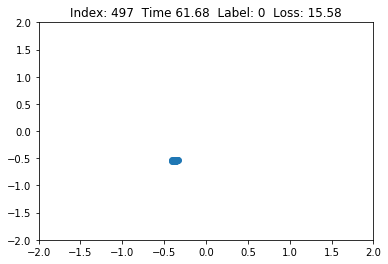

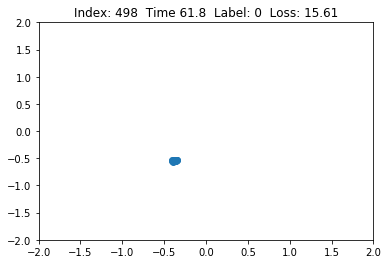

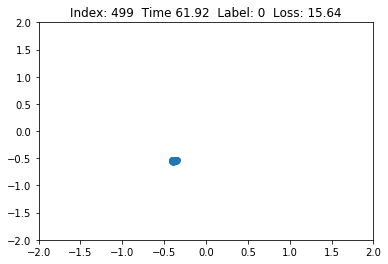

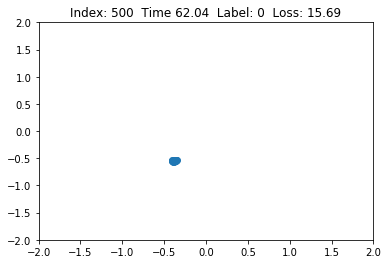

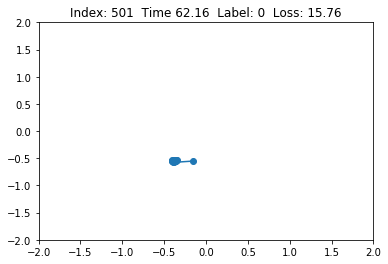

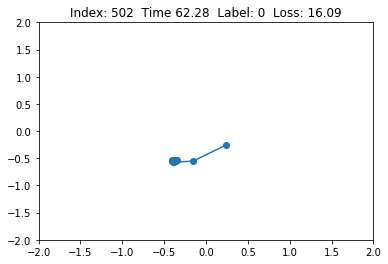

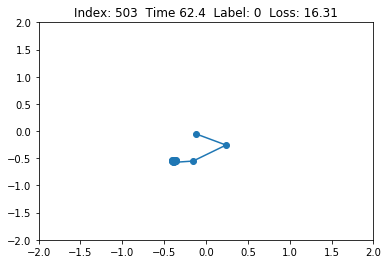

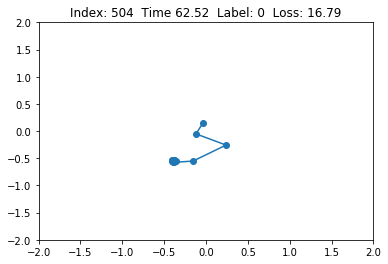

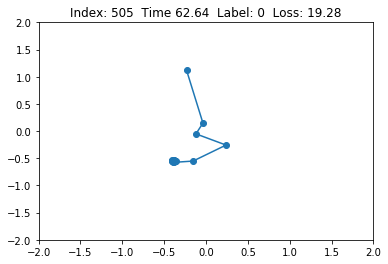

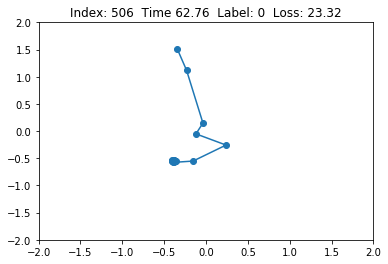

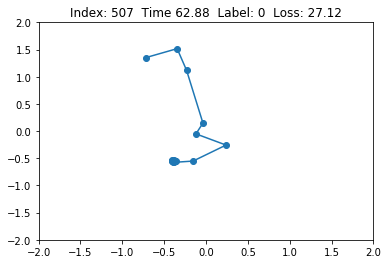

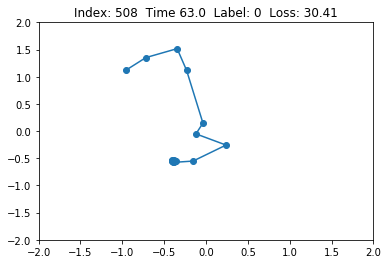

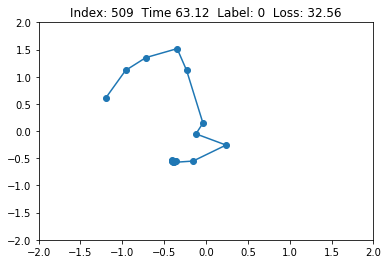

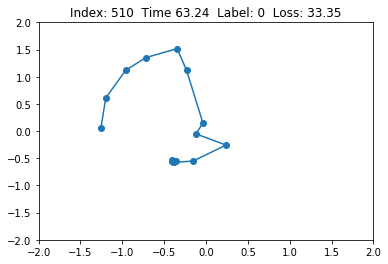

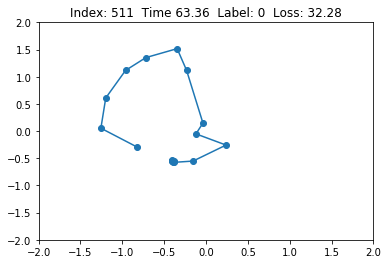

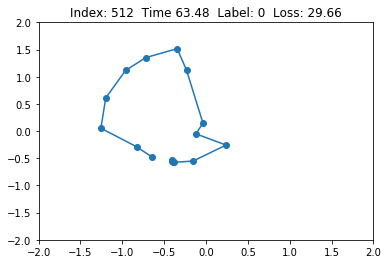

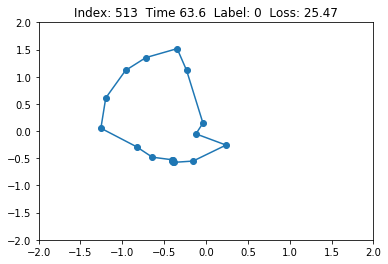

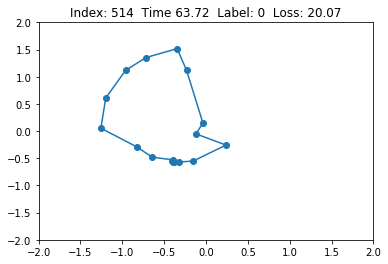

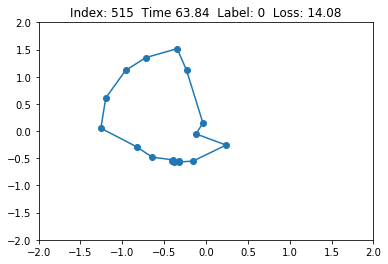

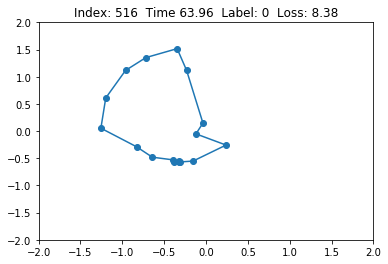

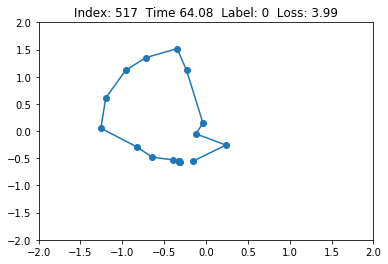

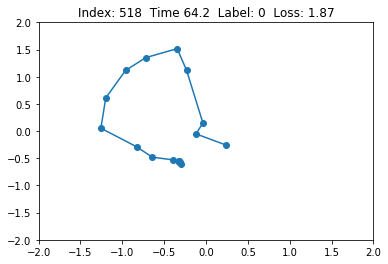

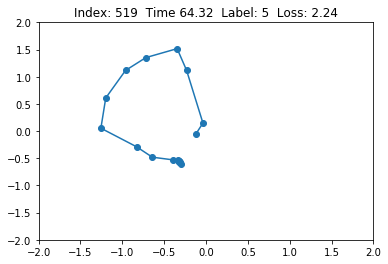

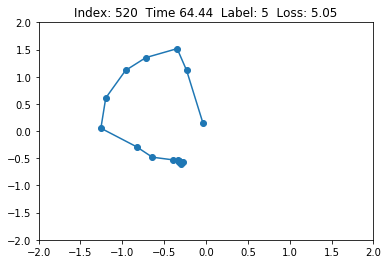

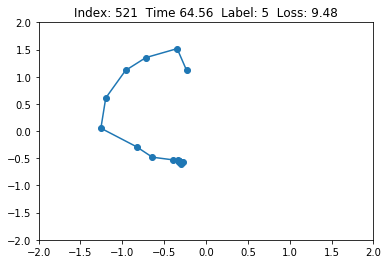

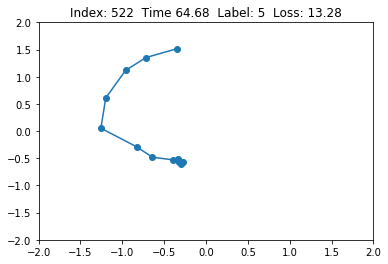

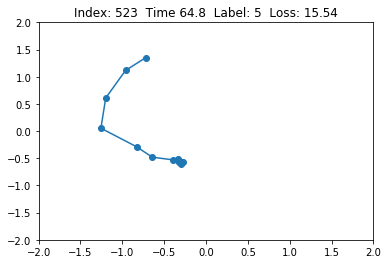

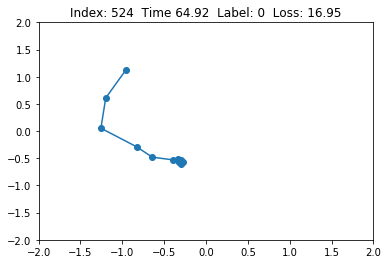

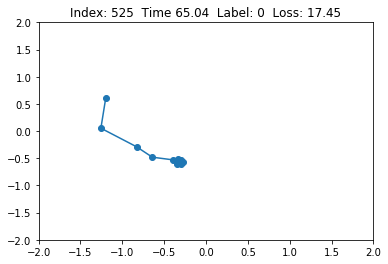

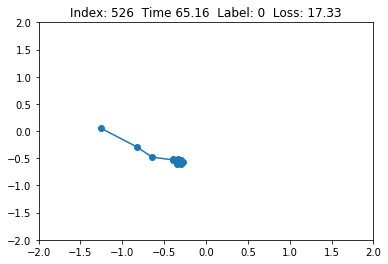

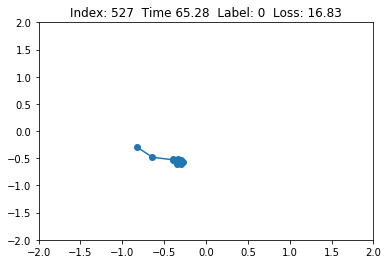

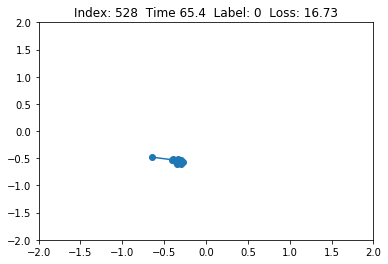

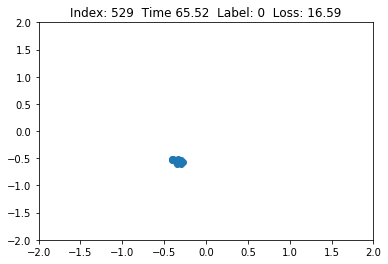

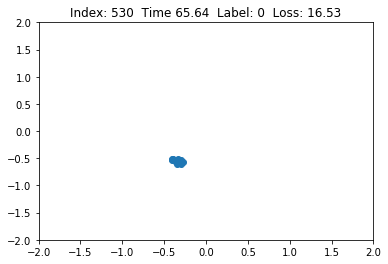

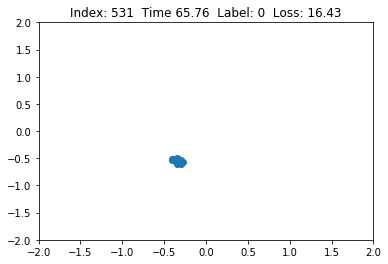

In [88]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#print(feat_dict)


key = 'leftWrist'
kx = key + '_x'
ky = key + '_y'



for i in range(0,n):
    axes = plt.gca()
    axes.set_xlim([-2,2])
    axes.set_ylim([-2,2])
    plt.plot(X[i,:,feat_dict[kx]],X[i,:,feat_dict[ky]], marker = "o")
    ser = squared_error(avgCircle[:,0], X[i,:,feat_dict[kx]], avgCircle[:,1], X[i,:,feat_dict[ky]])
    plt.title("Index: " + str(i) + "  " + "Time " + str(round(lgen.sequence_end_time[i]/1000,2)) + "  " +\
              "Label: " + str(int(lgen.y[i])) + "  Loss: " + str(ser))
    plt.show()
    plt.close()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
print(feat_dict)

i = 110
key = 'leftWrist'
kx = key + '_x'
ky = key + '_y'

#axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])
plt.figure(1)

plt.subplot(241)
plt.plot(P[i,:,feat_dict[kx]],P[i,:,feat_dict[ky]])
plt.title("Index: " + str(i) + "  " + "Label: " + str(int(de.y[i])))

plt.subplot(242)
plt.plot(P[i+1,:,feat_dict[kx]],P[i+1,:,feat_dict[ky]])
plt.title("Index: " + str(i+1) + "  " + "Label: " + str(int(de.y[i+1])))

plt.subplot(243)
plt.plot(P[i+2,:,feat_dict[kx]],P[i+2,:,feat_dict[ky]])
plt.title("Index: " + str(i+2) + "  " + "Label: " + str(int(de.y[i+2])))

plt.subplot(244)
plt.plot(P[i+2,:,feat_dict[kx]],P[i+2,:,feat_dict[ky]])
plt.title("Index: " + str(i+3) + "  " + "Label: " + str(int(de.y[i+3])))

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1, bottom=0.0, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()